# <center> DATA 601 PROJECT REPORT:
# <center> An Analysis of Calgary Satisfaction Data and Safety

### <center> (L01-5) - *Olatomi Adigun, Gigi Chung, James Oblea, Jericho Pantony, Michaela Reyes*
### <center> October 18, 2023

# Importing Required Packages

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from shapely.wkt import loads
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import plotly.offline as pyo
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Introduction

<div style="text-align: justify;">

Calgary is currently experiencing significant population growth, as highlighted in a recent report by CBC, which has identified a "record annual population surge" (Fernando, 2023). For individuals new to Calgary, there are several crucial factors to take into account when selecting an area to live and call home. Among these factors, a top priority is safety which will also play as our main point of interest in our exploration. Our project aims to evaluate the satisfaction levels reported by current Calgary residents in the year 2022 and gain insights into the factors that contribute to their satisfaction. By doing so, we strive to offer valuable information that can assist newcomers in making well-informed decisions when establishing themselves in Calgary. Our target audience for our project consists of newcomers from different backgrounds intending to relocate and establish themselves in Calgary. Through an analysis of this dataset, our primary objectives are to address four key questions:

</div>

1. **Which area(s) in Calgary has the highest satisfaction level?**
2. **How does satisfaction vary among different demographic groups (e.g. age, gender, income, education) in different areas of Calgary?**
3. **How safe do Calgarians feel and what areas report higher safety levels? Does safety correlate with satisfaction levels?**
4. **Can we find relationships between community crime statistics and reported levels of satisfaction on safety?**



# Datasets

<div style="text-align: justify;">

The 2022 Fall Survey of Calgarians (The City of Calgary, 2023) is an annual telephone survey conducted by the City of Calgary with a randomly selected sample of Calgarians aged 18 years and older. As it is on the City of Calgary’s Open Data Portal, we have permission to access and use the dataset. It is a structured dataset in tabular format. This dataset consists of 2,501 rows, each representing an individual respondent, and 141 columns. The columns within the dataset are used to record responses to survey questions. However, instead of directly displaying the actual categories or responses, the cells under each column are encoded with numerical values. These numerical values will require mapping to their corresponding categories or labels in order to make the data more readable and interpretable.

A separate Excel file of metadata summarizes how each question number and corresponding numerical values are mapped to the actual question and responses. For example, the question number “q10” is mapped to “How safe do you feel or would you feel walking alone in your neighborhood after dark?”, then values 1 to 6 are mapped to “q10”, with 1 being “very safe”, 2 as “reasonably safe”, 3 as “somewhat unsafe”, 4 as “very unsafe”, 5 as “don’t know”, and 6 as “don’t know/ not sure”.

In addition to the main dataset on the satisfaction of residents living in Calgary areas, we will employ a peripheral data set that includes a wide array of information regarding Calgary crime statistics. This dataset also originates from the same source as the survey data and includes 76,975 rows and 11 columns on the date, location, number of crime occurrences, and type of crime in Calgary. We plan on drawing relationships between these variables and reported satisfaction levels especially regarding safety.

</div>


## Importing Datasets

### Main Dataset

In [292]:
main_dataset = pd.read_csv("Main Dataset.csv")
main_dataset.head()

,Mweight0,qwave,s4qt,market2,q39,q34,q37,q38new,q32x,q40x,...,q9_2_26,q9_2_27,q9_2_28,q9_2_29,q9_2_30,q9_2_31,q9_2_32,q9_2_33,q9_2_34,q9_2_35
0,1.05,Year-2023,3,4,8,1,7,3,2,2,...,1.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1,0.74,Year-2023,1,8,8,1,8,5,1,2,...,1.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2,1.07,Year-2023,4,5,9,1,2,2,2,2,...,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,3.0,NaN
3,0.66,Year-2023,1,6,7,1,4,5,2,2,...,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0
4,0.80,Year-2023,1,11,4,1,11,4,2,2,...,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN


### Metadata Dataset

In [293]:
meta = pd.read_excel("New_Fall_Variable_Meta-data_2022_Onward (1).xlsx")
meta.head()

,variable,value,valuelabel,question_stem,questiontype,question_label,topbox,measure_type
0,MWeight0,NaN,NaN,Response weight,NaN,Response weight,NaN,Numerical
1,qwave,NaN,NaN,Year of survey,NaN,Year of survey,NaN,Categorical
2,s4qt,1.0,Southwest,Could you please provide me with the first thr...,NaN,Quadrant of Calgary,NaN,Categorical
3,s4qt,2.0,Southeast,Could you please provide me with the first thr...,NaN,Quadrant of Calgary,NaN,Categorical
4,s4qt,3.0,Northwest,Could you please provide me with the first thr...,NaN,Quadrant of Calgary,NaN,Categorical


### Crime Dataset

In [294]:
# Read Community Crime data
crimedata = pd.read_csv("Community_Crime_Statistics.csv")

crimedata["Year"] = pd.to_datetime(crimedata["Year"], format="%Y")

crimedata = crimedata.loc[crimedata["Year"].dt.year > 2021]
#display(crimedata)
crimetype = ["Theft FROM Vehicle", "Break & Enter - Dwelling", "Street Robbery", "Theft OF Vehicle"]
crimedata = crimedata[crimedata["Category"].isin(crimetype)]
#crimedata.isnull().sum()

crimedata.dropna(subset =["Crime Count","Ward Boundaries"])

crimedata = crimedata.drop(["ID","Resident Count","Calgary Communities", "Ward Boundaries 2013-2017", "City Quadrants"], axis=1)
display(crimedata)

,Sector,Community Name,Category,Crime Count,Date,Year,Month,Community Center Point,Ward Boundaries
3,NORTHWEST,01K,Theft FROM Vehicle,2.0,2022/04,2022-01-01,APR,POINT (-114.222716308933 51.168724290089),3.0
5,NORTH,03W,Theft FROM Vehicle,1.0,2022/04,2022-01-01,APR,POINT (-114.026242634091 51.197967711165),11.0
6,NORTHEAST,05D,Theft FROM Vehicle,1.0,2022/04,2022-01-01,APR,POINT (-113.958660846149 51.179594126023),11.0
7,EAST,09O,Theft OF Vehicle,2.0,2022/04,2022-01-01,APR,POINT (-113.877106941343 51.052571080807),12.0
9,SOUTHEAST,12A,Theft OF Vehicle,2.0,2022/04,2022-01-01,APR,POINT (-113.893231521478 50.965056151113),4.0
...,...,...,...,...,...,...,...,...,...
78933,SOUTH,ACADIA,Theft OF Vehicle,9.0,2022/07,2022-01-01,JUL,POINT (-114.053696016182 50.972415073347),10.0
79361,SOUTH,ACADIA,Theft OF Vehicle,4.0,2022/10,2022-01-01,OCT,POINT (-114.053696016182 50.972415073347),10.0
79411,EAST,DOVER,Theft OF Vehicle,15.0,2022/10,2022-01-01,OCT,POINT (-113.993054009063 51.022567722504),10.0
79444,EAST,FOREST LAWN INDUSTRIAL,Theft FROM Vehicle,NaN,2023/05,2023-01-01,MAY,POINT (-113.95696985983 51.027094776949),12.0


### Ward Boundaries Dataset

In [295]:
# Read Ward Boundaries CSV file
ward_boundaries = pd.read_csv("Ward_Boundaries.csv")

# Replace Ward label to be consistent with relevant dataset
ward_boundaries.rename(columns={'WARD_NUM': 'City of Calgary Ward'}, inplace = True)


# Data Wrangling and Cleaning

<div style="text-align: justify;">

To commence our analysis, our initial focus was on data cleaning. Given the considerable size of the dataset, we began by identifying and isolating the relevant variables (columns) essential for our analysis. This involved creating subsets of the primary dataset to enhance performance and streamline data compilation. Next, we used the metadata file to facilitate the renaming of column headers in the primary dataset. A similar procedure was applied to our "numerical values" response variables. Furthermore, we established a connection between our Ward boundary dataset and the primary dataset, utilizing the ward number as the common identifier in both datasets. Additionally, the community crime statistics dataset was linked to the main dataset; however, we've grouped this process with guiding question 4 for the sake of illustration. The subsequent steps offer a more detailed breakdown of these procedures:

</div>

## Extracting Relevant Columns from Main Dataset

Table 1.0 below shows the variables from the main dataset that we are interested in and will be using in this project.

**Table 1.0 - DESCRIPTION OF VARIABLES FOR MAIN DATASET**

| <center>**Variable** <center>     | <center>**Description**<center>                                                                                                             | <center>**Measure Type**<center> |
|-------------------|-----------------------------------------------------------------------------------------------------------------------------|------------------|
| Age               | The age of the respondent. Options incrementally range from 18 to more than 64                                              | Categorical      |
| Area              | The respondent’s last three digits of the postal code                                                                       | Categorical      |
| Education Level   | The highest schooling that the respondent has obtained.                                                                     | Categorical      |
| Gender            | The gender of the respondent with options to select self-describe, refuse, other, or don’t know.                            | Categorical      |
| Household Income  | The total annual income, before taxes of the respondents household. Options incrementally range from <$30,000 to >$120,000. | Categorical      |
| Household Children| Whether the respondent has children under 18 years of age in their household                                                | Categorical      |
| Quality of Life   | Rates the overall quality of life. Options range from 1 (very poor) to 10 (very good)                                       | Ordinal          |
| Overall Safety    | Rates how safe the respondent feels overall from 1 (very safe) to 4 (very unsafe)                                           | Ordinal          |
| Safety after Dark | Rates how safe the respondent feels walking alone after dark from 1 (very safe) to 4 (very unsafe)                          | Ordinal          |

*Note: The respondent also has the choice to respond "Don't Know/Unsure" with every variable*

In [296]:
relevant_columns = ['market2','q29x','q30','q32x','q39', 's4qt','q10','q10c','q2a', 'q9_1_4', 'q9_1_6', 'q9_1_8', 'q38new']
relevant_dataset = main_dataset[relevant_columns]
relevant_dataset.head()

,market2,q29x,q30,q32x,q39,s4qt,q10,q10c,q2a,q9_1_4,q9_1_6,q9_1_8,q38new
0,4,2,4.0,2,8,3,1,4,4,NaN,NaN,3.0,3
1,8,1,6.0,1,8,1,2,2,7,NaN,NaN,3.0,5
2,5,2,NaN,2,9,4,2,2,8,3.0,2.0,NaN,2
3,6,1,6.0,2,7,1,1,2,8,NaN,NaN,1.0,5
4,11,2,6.0,2,4,1,1,2,8,4.0,2.0,NaN,4


In [297]:
main_columns = np.array(relevant_dataset.columns)
print(main_columns, "\n", len(main_columns))

['market2' 'q29x' 'q30' 'q32x' 'q39' 's4qt' 'q10' 'q10c' 'q2a' 'q9_1_4'
 'q9_1_6' 'q9_1_8' 'q38new'] 
 13


## Mapping Column Names from Metadata

<div style="text-align: justify;">

In the process of improving the clarity of our main dataset, we are crucially mapping the column names within it to their corresponding descriptive counterparts found in the metadata. The main dataset uses abbreviated and somewhat mysterious column names like "q10," "q1," and "q2." However, the metadata provides detailed descriptions of each column's content and purpose, serving as a guide to decode these cryptic labels. Through this mapping effort, our goal is to bring clarity and context to the main dataset, making it more understandable. This connection between abbreviated identifiers and meaningful descriptions not only enhances our grasp of the data but also streamlines analytical processes, making our data-driven endeavors more effective.

</div>

In [298]:
meta_questions = np.unique(meta.loc[:,"question_label"])
#print(meta_questions, "\n", len(meta_questions))

In [299]:
for i in range(len(main_columns)):
    for j in range(len(meta)):
        if relevant_dataset.columns[i] == meta.loc[j,"variable"]:
            new_name = meta.loc[j,"question_label"]
            new_name = new_name.strip('\n')
            new_name = new_name.strip()
            
            relevant_dataset.rename(columns = {relevant_dataset.columns[i]:new_name}, inplace=True)

/var/folders/h_/mr5z3jt574qdqtwf5lgl3z640000gn/T/ipykernel_41246/3624353673.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [300]:
relevant_dataset.head()

,City of Calgary Ward,Gender,Age group,Children in household,Household income category,Quadrant of Calgary,How safe do you feel or would you feel walking alone in your neighborhood after dark?,How safe or unsafe do you think Calgary is overall?,Overall quality of life,"Calgary's parks, playgrounds and other open spaces/Parks & open spaces",Service Satisfaction_ Social programs for individuals such as seniors or youth/Social services for individuals such as seniors or youth,Service Satisfaction_ Calgary Transit including bus and CTrain service/Public transit including bus and C-Train service,Highest level of education
0,4,2,4.0,2,8,3,1,4,4,NaN,NaN,3.0,3
1,8,1,6.0,1,8,1,2,2,7,NaN,NaN,3.0,5
2,5,2,NaN,2,9,4,2,2,8,3.0,2.0,NaN,2
3,6,1,6.0,2,7,1,1,2,8,NaN,NaN,1.0,5
4,11,2,6.0,2,4,1,1,2,8,4.0,2.0,NaN,4


## Mapping "numerical value" responses to categories from the Metadata

<div style="text-align: justify;">

In the ongoing effort to enhance the interpretability of our main dataset, we will now be doing the vital task of linking numerical entries (encoded as 1, 2, 3, etc.) to their corresponding real-world categories as elucidated in the metadata. As mentioned previously, the main dataset employs numeric codes to represent various elements, and the metadata provides the key by offering comprehensive descriptions for each numerical entry, detailing what they signify. Through this mapping process, we aim to translate these numerical responses into their actual categorical counterparts, bridging the gap between encoded values and their meaningful interpretations.

</div>

## Safety & Satisfaction Columns

In [301]:
safety_map_dict = {1: "Very safe", 2: "Reasonably safe", 3: "Somewhat unsafe", 4: "Very unsafe", 5:"Don't know", 6:"Don't know / Not sure"}
service_satisfaction_map_dict = {1.0:'Not at all satisfied', 2.0:'Not very satisfied', 3.0:'Somewhat satisfied', 4.0:'Very satisfied', 5.0:'Don\'t know', 6.0:'Don\'t know / Not sure', np.nan:'No Response'}
relevant_dataset = relevant_dataset.replace({"How safe do you feel or would you feel walking alone in your neighborhood after dark?": safety_map_dict, 
                                             "How safe or unsafe do you think Calgary is overall?":safety_map_dict,
                                             "Calgary's parks, playgrounds and other open spaces/Parks & open spaces": service_satisfaction_map_dict,
                                             "Service Satisfaction_  Social programs for individuals such as seniors or youth/Social services for individuals such as seniors or youth":service_satisfaction_map_dict,
                                             "Service Satisfaction_  Calgary Transit including bus and CTrain service/Public transit including bus and C-Train service": service_satisfaction_map_dict})



relevant_dataset.head(10)

,City of Calgary Ward,Gender,Age group,Children in household,Household income category,Quadrant of Calgary,How safe do you feel or would you feel walking alone in your neighborhood after dark?,How safe or unsafe do you think Calgary is overall?,Overall quality of life,"Calgary's parks, playgrounds and other open spaces/Parks & open spaces",Service Satisfaction_ Social programs for individuals such as seniors or youth/Social services for individuals such as seniors or youth,Service Satisfaction_ Calgary Transit including bus and CTrain service/Public transit including bus and C-Train service,Highest level of education
0,4,2,4.0,2,8,3,Very safe,Very unsafe,4,No Response,No Response,Somewhat satisfied,3
1,8,1,6.0,1,8,1,Reasonably safe,Reasonably safe,7,No Response,No Response,Somewhat satisfied,5
2,5,2,NaN,2,9,4,Reasonably safe,Reasonably safe,8,Somewhat satisfied,Not very satisfied,No Response,2
3,6,1,6.0,2,7,1,Very safe,Reasonably safe,8,No Response,No Response,Not at all satisfied,5
4,11,2,6.0,2,4,1,Very safe,Reasonably safe,8,Very satisfied,Not very satisfied,No Response,4
5,1,2,6.0,2,8,3,Very safe,Reasonably safe,7,No Response,No Response,Very satisfied,5
6,7,1,NaN,2,9,3,Reasonably safe,Reasonably safe,5,Very satisfied,Somewhat satisfied,No Response,6
7,10,2,6.0,2,5,4,Somewhat unsafe,Somewhat unsafe,4,No Response,No Response,Not very satisfied,2
8,13,1,6.0,2,2,1,Reasonably safe,Reasonably safe,5,Somewhat satisfied,Very satisfied,No Response,4
9,14,1,2.0,1,4,2,Reasonably safe,Reasonably safe,9,No Response,No Response,Very satisfied,5


## Linking Ward Boundary dataset with Main dataset
Because our goal is to visualize geographic data, we need to link the ward boundary data to the main dataset. 

In [302]:
# Join Ward Boundaries into the main data set
relevant_dataset = relevant_dataset.merge(ward_boundaries, on='City of Calgary Ward', how='inner')

relevant_dataset.head()


,City of Calgary Ward,Gender,Age group,Children in household,Household income category,Quadrant of Calgary,How safe do you feel or would you feel walking alone in your neighborhood after dark?,How safe or unsafe do you think Calgary is overall?,Overall quality of life,"Calgary's parks, playgrounds and other open spaces/Parks & open spaces",Service Satisfaction_ Social programs for individuals such as seniors or youth/Social services for individuals such as seniors or youth,Service Satisfaction_ Calgary Transit including bus and CTrain service/Public transit including bus and C-Train service,Highest level of education,MULTIPOLYGON,COUNCILLOR,LABEL
0,4,2,4.0,2,8,3,Very safe,Very unsafe,4,No Response,No Response,Somewhat satisfied,3,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Sean Chu,WARD 4
1,4,2,4.0,1,8,3,Reasonably safe,Reasonably safe,6,Somewhat satisfied,Somewhat satisfied,No Response,5,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Sean Chu,WARD 4
2,4,1,6.0,2,1,3,Somewhat unsafe,Somewhat unsafe,5,Very satisfied,Somewhat satisfied,No Response,4,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Sean Chu,WARD 4
3,4,2,5.0,2,3,3,Reasonably safe,Somewhat unsafe,6,No Response,No Response,Somewhat satisfied,3,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Sean Chu,WARD 4
4,4,2,6.0,2,1,3,Somewhat unsafe,Reasonably safe,8,No Response,No Response,Somewhat satisfied,5,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Sean Chu,WARD 4


# Guiding Question 1 - Which area(s) in Calgary has the highest satisfaction level?

<div style="text-align: justify;">

This question is important as it helps us understand the overall quality of life and well-being in different areas within Calgary and how they vary from one another. Understanding which areas in Calgary have the highest satisfaction levels provides us with a starting point for a deeper analysis on what makes those areas particularly satisfying for residents. We can investigate the specific services and/or community features that contribute to the residents’ contentment. Therefore, for newcomers in Calgary, this can guide them to select areas that are more likely to align with their preferences and lifestyle, facilitating a smoother transition and a better start to their life in Calgary.

We will focus on this variable of interest: Satisfaction level. The satisfaction level is the “Quality of Life'' variable (see table 1.0 above). The respondents are asked to rate the overall quality of life in Calgary on a scale ranging from 1 (Very poor) to 10 (Very good)(The City of Calgary, 2023). For ward data, the respondent is asked for the last three digits of their postal code (The City of Calgary, 2023).

</div>


<div style="text-align: justify;">

The data can be effectively represented using both a bar plot and a choropleth map.The bar chart showcases the average satisfaction level by ward, and upon plotting, we observed a relatively consistent satisfaction level across the wards with little to no significant variation. As a result, we decided to standardize the satisfaction levels to emphasize these subtle variations, allowing for clearer comparisons.

We simplified the satisfaction levels into a binary scale, categorizing responses from <i>7 to 10</i> as '<b>good</b>' and assigning them a value of '<b>1</b>,' while all other responses were labeled as '<b>0</b>.' Subsequently, we calculated the proportion of 'good' responses for each ward and visualized this information.

</div>


We proceeded to present the data in two ways: first, with a bar chart illustrating the Mean Satisfaction level by ward, utilizing the newly scaled satisfaction level.

In [303]:
#Scale the satisfaction column
relevant_dataset["Overall quality of life_scaled"] = (relevant_dataset["Overall quality of life"].astype(float)>6).astype(int)

In [304]:
#Get satisfaction levels by ward
satisfaction_by_ward= round(relevant_dataset.groupby("LABEL")["Overall quality of life_scaled"].mean()*100,2).sort_values(ascending=False)

Text(0.5, 1.0, 'Satisfaction Level by Ward')

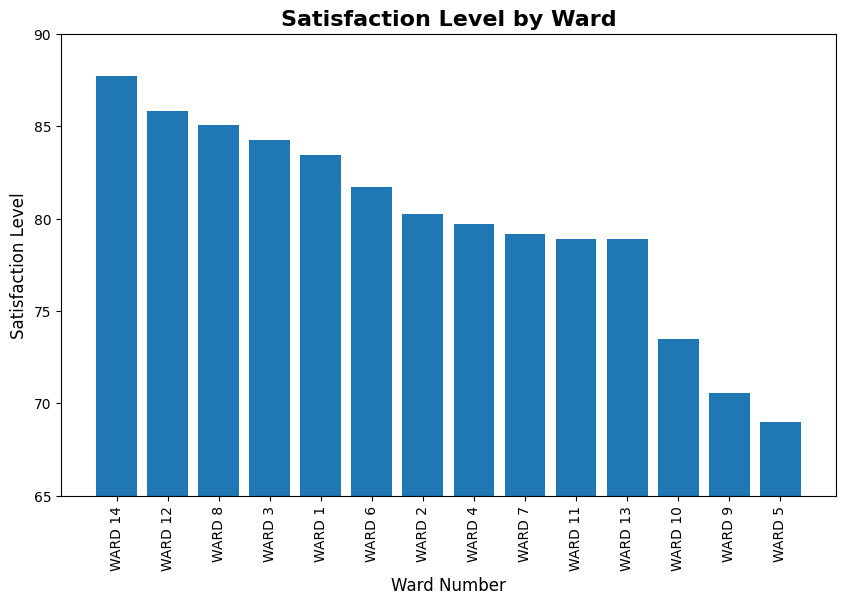

In [305]:
#Set a figure size
plt.figure(figsize=(10, 6))

#Create barchart
plt.bar(satisfaction_by_ward.index,satisfaction_by_ward.values)

# Set a y-axis limit to emphasize the range from 65 to 90
plt.ylim(65,90)
plt.xlabel("Ward Number",fontsize=12)
plt.xticks(rotation=90)
plt.ylabel("Satisfaction Level", fontsize=12)
plt.title("Satisfaction Level by Ward", fontsize=16, fontweight='bold')

In [306]:
satisfaction_by_ward = pd.DataFrame(satisfaction_by_ward) #.to_frame()
satisfaction_by_ward.reset_index(inplace=True)
satisfaction_by_ward

,LABEL,Overall quality of life_scaled
0,WARD 14,87.73
1,WARD 12,85.81
2,WARD 8,85.08
3,WARD 3,84.27
4,WARD 1,83.42
5,WARD 6,81.73
6,WARD 2,80.26
7,WARD 4,79.68
8,WARD 7,79.17
9,WARD 11,78.87


In [307]:
ward_info= pd.read_csv("Ward_Boundaries.csv", usecols=["MULTIPOLYGON", "WARD_NUM"])

ward_info['WARD_NUM'] = 'WARD ' + ward_info['WARD_NUM'].astype(str)

ward_info.rename(columns={'WARD_NUM':'LABEL'}, inplace=True)

#Merge main_ward_satisfaction with ward_info based on 'market2' and 'WARD_NUM'
satisfaction_by_ward_geo= pd.merge(satisfaction_by_ward, ward_info, how='left', on='LABEL')

satisfaction_by_ward_geo.head()

,LABEL,Overall quality of life_scaled,MULTIPOLYGON
0,WARD 14,87.73,"MULTIPOLYGON (((-114.0225205 50.9526149, -114...."
1,WARD 12,85.81,"MULTIPOLYGON (((-113.9117779 50.9796715, -113...."
2,WARD 8,85.08,"MULTIPOLYGON (((-114.1229467 51.0501104, -114...."
3,WARD 3,84.27,"MULTIPOLYGON (((-114.0132905 51.2124253, -114...."
4,WARD 1,83.42,"MULTIPOLYGON (((-114.2111145 51.1833588, -114...."


In [308]:
satisfaction_by_ward_geo['MULTIPOLYGON'] = satisfaction_by_ward_geo['MULTIPOLYGON'].apply(loads)

satisfaction_by_ward_geo_gdf = gpd.GeoDataFrame(satisfaction_by_ward_geo, geometry='MULTIPOLYGON', crs='EPSG:4326')

<div style="text-align: justify;">

Additionally, we visualized the same data using a choropleth map, where darker shades signify higher satisfaction levels.

</div>

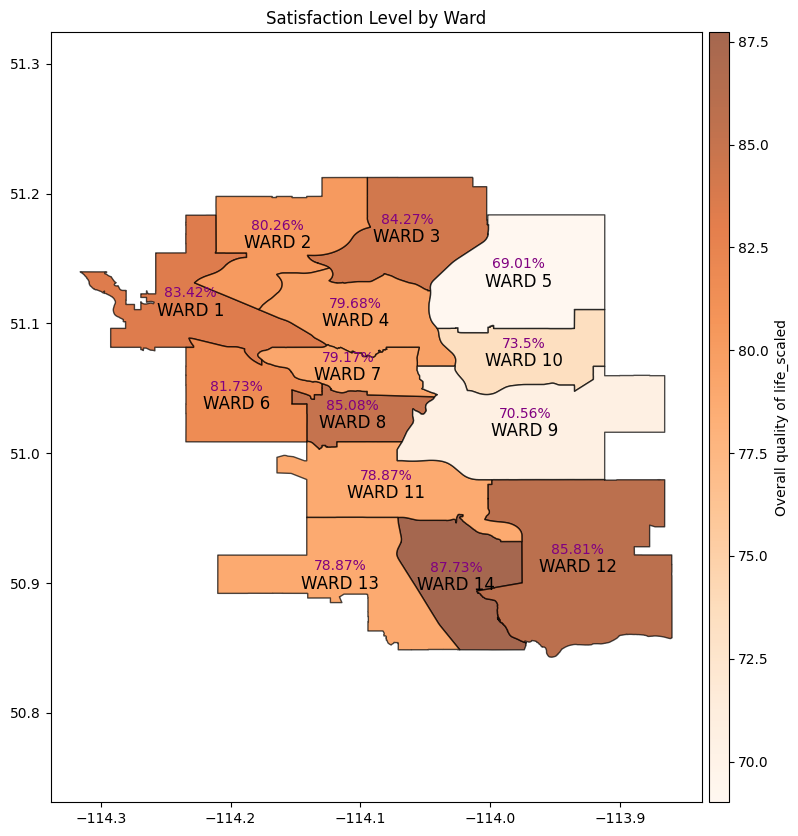

In [309]:
fig = plt.figure()
axis = fig.add_subplot(1,1,1)

# Normalize the 'proportion' values to map them to the colormap
norm = Normalize(vmin=satisfaction_by_ward_geo_gdf['Overall quality of life_scaled'].min(), vmax=satisfaction_by_ward_geo_gdf['Overall quality of life_scaled'].max())
satisfaction_by_ward_geo_gdf.plot(ax=axis, edgecolor='black',cmap='Oranges', alpha=0.7, column='Overall quality of life_scaled', norm=norm)

# Annotate each ward with its name and proportion
for idx, row in satisfaction_by_ward_geo_gdf.iterrows():
    ward_name = row['LABEL']
    proportion = str(row['Overall quality of life_scaled']) +"%"
    x, y = row['MULTIPOLYGON'].centroid.x, row['MULTIPOLYGON'].centroid.y
    #axis.annotate(f"{ward_name}\n {proportion}", xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
    # Customize the size and color of the ward labels
    axis.annotate(ward_name, xy=(x, y), xytext=(-4, -8), textcoords='offset points', color='black', fontsize=12, ha='center')

    # Customize the size and color of the proportion labels
    axis.annotate(f"{proportion}", xy=(x, y), xytext=(-4, 5), textcoords='offset points', color='purple', fontsize=10, ha='center')

# Add colorbar
cbar = plt.colorbar(axis.get_children()[0], ax=axis, pad=0.01, orientation='vertical', aspect=40)
cbar.set_label('Overall quality of life_scaled')

plt.axis('equal')
plt.title('Satisfaction Level by Ward')
fig.set_size_inches(10,10)

<div style="text-align: justify;">

To summarize, the Overall Quality of Life distribution is noteworthy for its predominant data points clustering around values 7 and 8, with the most significant contributions originating from Wards 14, 12, and 8, while Wards 10, 9, and 5 display the lowest contributions.

With these visualizations in hand, we will now delve deeper into our analysis to answer the remaining guiding questions. Understanding this will provide insights into the factors contributing to residents' contentment and assist newcomers in choosing areas that align with their preferences and lifestyles for a smoother transition to life in Calgary.

</div>


# Guiding Question 2 - How does satisfaction vary among different demographic groups (e.g. age, gender, income, education) in different areas of Calgary?

<div style="text-align: justify;">

Understanding how satisfaction levels vary among different groups of newcomers is essential for tailoring area recommendations in Calgary to meet the diverse needs of individuals and families. By uncovering these variations, we aim to identify common trends and preferences among the various demographic groups and ultimately provide personalized guidance to newcomers, ensuring they find an area that aligns with their specific requirements and preferences.

For instance, someone with a family would have a different priority than a young bachelor when it comes to looking for a home. While a family person might prioritize factors like safety and close proximity to her children’s day care centers or schools, someone relatively young and single might place a high value on communities with a vibrant social scene and recreational facilities instead. Therefore, it is important for us to deep dive as to how the satisfaction levels vary between different demographic groups in the different areas in Calgary to better understand their commonalities and preferences, thereby allowing us to recommend a more personalized and well-suited area for these newcomers.

The variables that will help us analyze these various demographic variables include age, gender, household income level, and education level (see table 1.0) (The City of Calgary, 2023). This analysis will provide valuable insights into the composition of Calgary's population and help us determine if specific demographic groups report higher satisfaction levels.

Two different graph styles can help answer these questions: a correlation plot, and sets of histograms. A correlation plot will give us a face value relationship of the overall satisfaction of Calgarians and their demographics. With our findings, we can then perform a more detailed exploration of the different distribution of demographics with the overall satisfaction.

</div>


,Gender,Age group,Household income category,Highest level of education,Overall quality of life
0,2,4.0,8,3,4
1,2,4.0,8,5,6
2,1,6.0,1,4,5
3,2,5.0,3,3,6
4,2,6.0,1,5,8


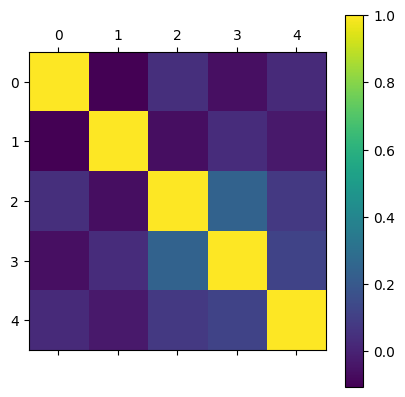

In [310]:
display(relevant_dataset.loc[:,["Gender", "Age group", "Household income category", "Highest level of education", "Overall quality of life"]].head())

plt.matshow(relevant_dataset.loc[:,["Gender", "Age group", "Household income category", "Highest level of education", "Overall quality of life"]].corr()) 
plt.colorbar()
plt.show()


<div style="text-align: justify;">

In this plot, we are most interested in the correlations of Overall Satisfaction (column 4) with the rest of the demographics (columns 0 to 3). Higher correlations between variables are represented by brighter colours in the intersections of these columns in the plot. Given this, we can see that there are no to low correlations between our main variable of interest - Overall Satisfaction, and the rest of the demographics. This means that variations in demographics do not lead to variations in the overall scores. A more concrete example can be seen when we investigate the distributions of different levels of a demographic.

</div>

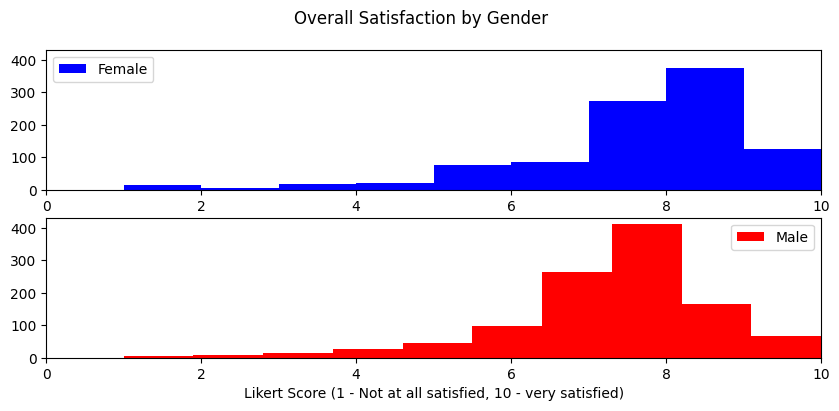

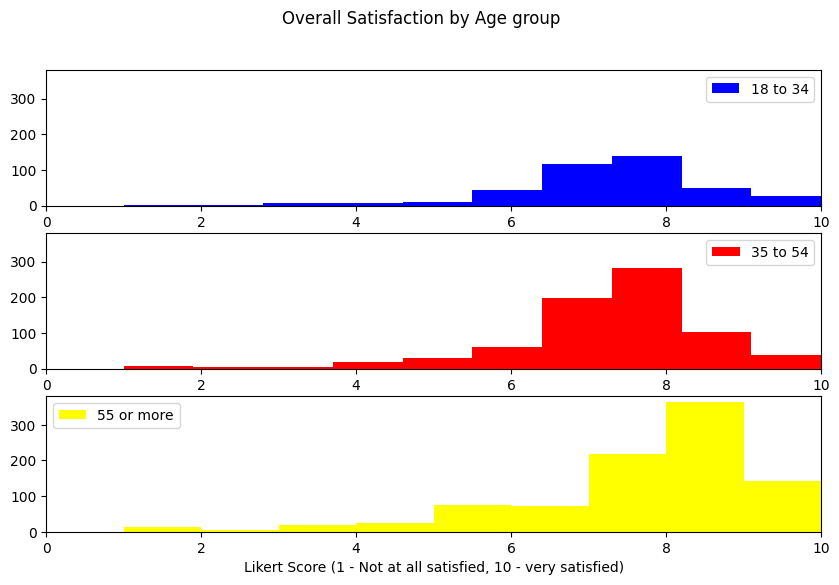

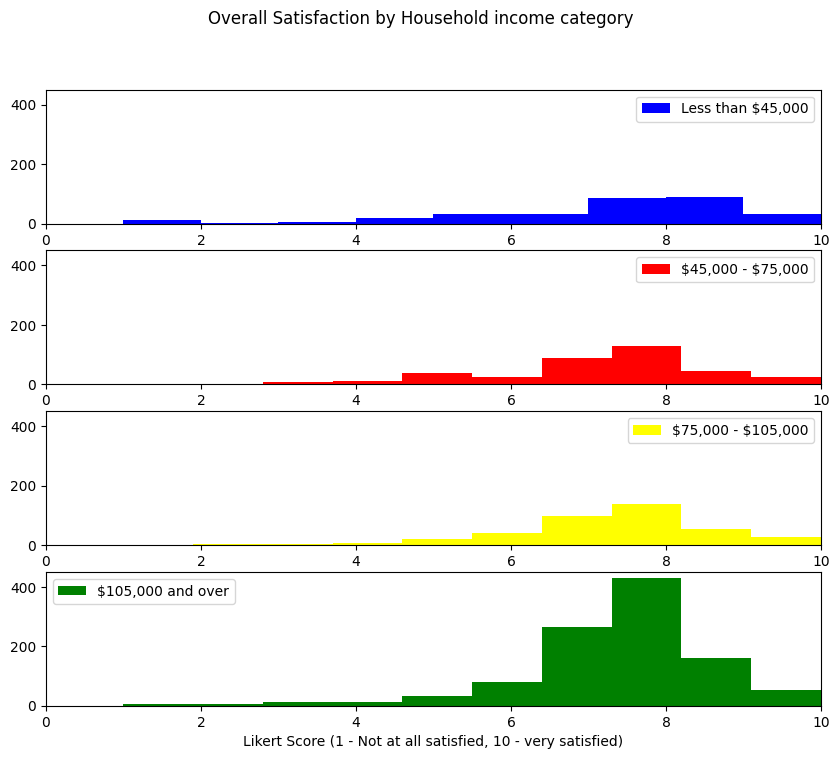

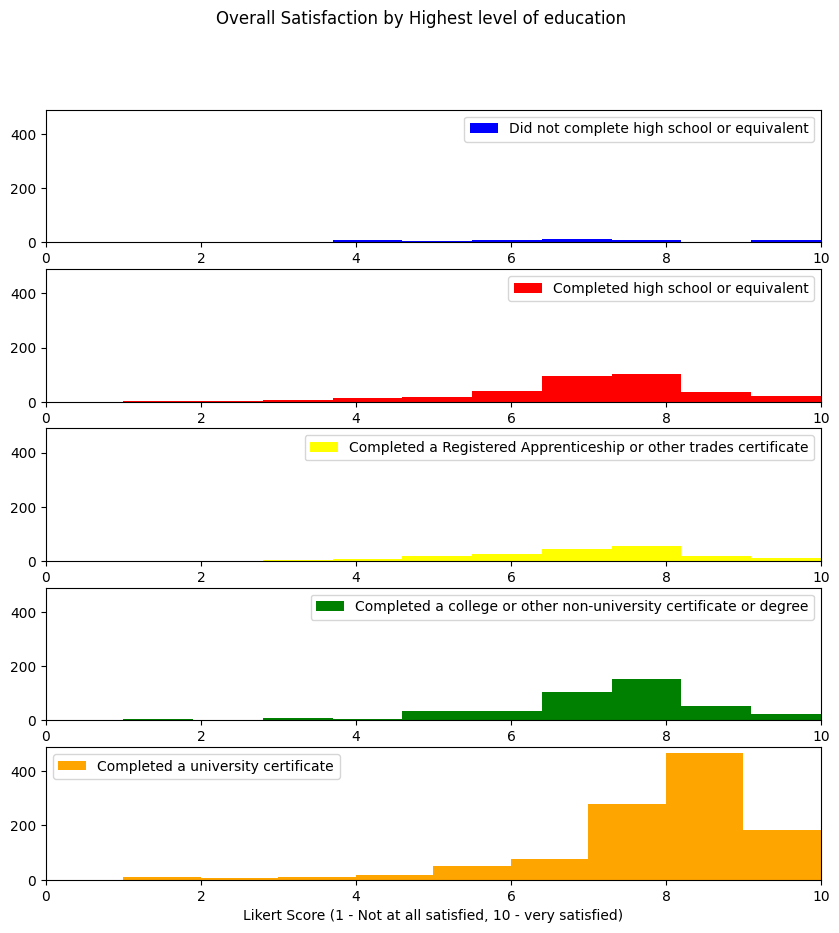

In [311]:
guide_2 = relevant_dataset.copy()
guide_2 = guide_2.drop(axis = 0, labels =  list(guide_2.index[guide_2["Gender"].isin([3,4,5,6])]) +
                       list(guide_2.index[guide_2["Age group"].isin([7])]) +
                       list(guide_2.index[guide_2["Household income category"].isin([9,10])]) +
                       list(guide_2.index[guide_2["Highest level of education"].isin([6])]))

guide_2["Age group"].replace(to_replace=6.0, value=5.0, inplace=True)
guide_2["Age group"].replace(to_replace=4.0, value=3.0, inplace=True)
guide_2["Age group"].replace(to_replace=2.0, value=1.0, inplace=True)

guide_2["Household income category"].replace(to_replace=8, value=7, inplace=True)
guide_2["Household income category"].replace(to_replace=6, value=5, inplace=True)
guide_2["Household income category"].replace(to_replace=4, value=3, inplace=True)
guide_2["Household income category"].replace(to_replace=2, value=1, inplace=True)

colors = ["blue", "red", "yellow", "green", "orange", "purple", "pink", "teal", "indigo"]
demographics_list = ["Gender", "Age group", "Household income category", "Highest level of education"]

# legend = {"Gender":["Female", "Male", "Prefer to self-describe", "Refused/prefer not to say", "Other", "Don't know"
# ], "Age group": ["18 to 24", "25 to 34", "35 to 44", "45 to 54", "55 to 64", "65 or more"
# ], "Household income category": ["Less than $30,000", "$30,000 - $45,000", "$45,000 - $60,000", "$60,000 - $75,000", "$75,000 - $90,000", "$90,000 - $105,000", "$105,000 - $120,000", "$120,000 - over", "Don't know", "Don't know/ Not sure"
# ], "Highest level of education": ["Did not complete high school or equivalent", "Completed high school or equivalent", "Completed a Registered Apprenticeship or other trades certificate", "Completed a college or other non-university certificate or degree", "Completed a university certificate", "diploma or degree", "Don't Know"
# ]}

legend = {"Gender":["Female", "Male", "Prefer to self-describe", "Refused/prefer not to say", "Other", "Don't know"
], "Age group": ["18 to 34", "35 to 54", "55 or more"
], "Household income category": ["Less than $45,000", "\$45,000 - $75,000", "\$75,000 - $105,000", "\$105,000 and over", "Don't know", "Don't know/ Not sure"
], "Highest level of education": ["Did not complete high school or equivalent", "Completed high school or equivalent", "Completed a Registered Apprenticeship or other trades certificate", "Completed a college or other non-university certificate or degree", "Completed a university certificate", "diploma or degree", "Don't Know"
]}

n_bins = 10

def demo_plots(demographic, statistic):

    demo = list(np.unique(guide_2[demographic].dropna()))
    title = str(f"Overall Satisfaction by {demographic}")

    fig_demo, fig_sub = plt.subplots(len(demo), figsize = (10, len(demo)*2), sharex = False, sharey = True)

    fig_demo.suptitle(title)
    for i,j,k,l in zip(demo, range(len(demo)), colors, range(len(legend[demographic]))):
        
        fig_sub[j].hist(guide_2[statistic][guide_2[demographic].isin([i])], color = k, label = legend[demographic][l], bins = n_bins)
        fig_sub[j].set(xlim = (0,10))
        fig_sub[j].set_xlabel("Likert Score (1 - Not at all satisfied, 10 - very satisfied)")       
        fig_sub[j].legend()


for demographic in demographics_list:
    demo_plots(demographic, "Overall quality of life")


<div style="text-align: justify;">

A histogram of the likert scores is shown between males and females. We can see that these distributions are similarly shaped (i.e. left-skewed, somewhat similar spreadness, and most of the data is centered around a score of 8) and thus suggest that there is no to little relationship between gender and overall satisfaction. This trend can be observed in other demographics and thus support what we have initially seen in the correlation plot.

Even though no relationships were evident, we can still find valuable insights in these graphs such as that certain demographics are more represented in our sample. We can observe this by looking at the area of the histograms of a specific level (e.g. more than $145000 household income) compared to other levels. Further investigation can be done if this sample accurately mirrors the Calgary population.

</div>

# Guiding Question 3 - How safe do Calgarians feel and what areas report higher safety levels? Does safety correlate with satisfaction levels?

<div style="text-align: justify;">

Safety is of utmost concern, particularly for newcomers seeking secure and welcoming environments for their families while considering their budget. Our analysis aims to understand the safety disparities among different communities and how these perceptions correlate with residents' overall satisfaction. By gaining insights into these safety aspects, we can provide valuable guidance to newcomers, helping them choose areas that align with their safety preferences and financial constraints.

There are two primary inquiries that will help us understand this question: the initial question, the variable named “Overall safety”, seeks to gauge respondents' perceptions of Calgary's overall safety, while the second question, the variable name “Safety after Dark”, assesses how safe respondents feel when walking alone in their neighborhood after dark (The City of Calgary, 2023). Response options for both questions span from 1 (Very safe) to 5 (Very unsafe).

</div>

In [312]:
satisfaction_safety = relevant_dataset[['City of Calgary Ward','How safe do you feel or would you feel walking alone in your neighborhood after dark?', 'How safe or unsafe do you think Calgary is overall?', 'Overall quality of life','MULTIPOLYGON']]
satisfaction_safety.head()

,City of Calgary Ward,How safe do you feel or would you feel walking alone in your neighborhood after dark?,How safe or unsafe do you think Calgary is overall?,Overall quality of life,MULTIPOLYGON
0,4,Very safe,Very unsafe,4,"MULTIPOLYGON (((-114.1213042 51.1386515, -114...."
1,4,Reasonably safe,Reasonably safe,6,"MULTIPOLYGON (((-114.1213042 51.1386515, -114...."
2,4,Somewhat unsafe,Somewhat unsafe,5,"MULTIPOLYGON (((-114.1213042 51.1386515, -114...."
3,4,Reasonably safe,Somewhat unsafe,6,"MULTIPOLYGON (((-114.1213042 51.1386515, -114...."
4,4,Somewhat unsafe,Reasonably safe,8,"MULTIPOLYGON (((-114.1213042 51.1386515, -114...."


## How safe do Calgarians feel and what areas report higher safety levels?

<div style="text-align: justify;">

For this part of the guiding question, we aim to investigate the proportion of Calgarians who responded it is safe for both survey questions as well as the proportion of them who feel that it is not safe based on each ward. As such, in this project, we will be grouping the response of “Very safe” and “Reasonably safe” as just “Safe” and those who responded “Somewhat unsafe”and “Very unsafe” as “Unsafe”.

We visualise these by plotting a map of Calgary broken down by its wards and showing the respective percentage of their views on safety.

</div>

In [313]:
# Define the function to categorize safety
def categorize_safety(safety):
    if safety == "Very safe" or safety == "Reasonably safe":
        return 'Safe'
    elif safety == "Very unsafe" or safety == "Somewhat unsafe":
        return 'Unsafe'
    else:
        return safety

# Apply the function to the How safe of unsafe do you think Calgary is overall column using the apply() function
satisfaction_safety.loc[:,'Overall_Congregated Safety Level'] = satisfaction_safety["How safe or unsafe do you think Calgary is overall?"].apply(categorize_safety)

# Apply the function to the How safe do you feel or would you feel walking alone in your neighborhood after dark column using the apply() function
satisfaction_safety.loc[:,'Neighbourhood_Congregated Safety Level'] = satisfaction_safety["How safe do you feel or would you feel walking alone in your neighborhood after dark?"].apply(categorize_safety)

satisfaction_safety.head()

/var/folders/h_/mr5z3jt574qdqtwf5lgl3z640000gn/T/ipykernel_41246/955282211.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/h_/mr5z3jt574qdqtwf5lgl3z640000gn/T/ipykernel_41246/955282211.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,City of Calgary Ward,How safe do you feel or would you feel walking alone in your neighborhood after dark?,How safe or unsafe do you think Calgary is overall?,Overall quality of life,MULTIPOLYGON,Overall_Congregated Safety Level,Neighbourhood_Congregated Safety Level
0,4,Very safe,Very unsafe,4,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Unsafe,Safe
1,4,Reasonably safe,Reasonably safe,6,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Safe,Safe
2,4,Somewhat unsafe,Somewhat unsafe,5,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Unsafe,Unsafe
3,4,Reasonably safe,Somewhat unsafe,6,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Unsafe,Safe
4,4,Somewhat unsafe,Reasonably safe,8,"MULTIPOLYGON (((-114.1213042 51.1386515, -114....",Safe,Unsafe


In [314]:
overall_table_ward_safety = satisfaction_safety.groupby(['City of Calgary Ward', 'Overall_Congregated Safety Level','MULTIPOLYGON']).size().reset_index(name='Count')
overall_table_ward_safety['Proportion'] = overall_table_ward_safety.groupby('City of Calgary Ward')['Count'].transform(lambda x: x / x.sum()).round(2)

overall_table_ward_safety.head()

,City of Calgary Ward,Overall_Congregated Safety Level,MULTIPOLYGON,Count,Proportion
0,1,Don't know,"MULTIPOLYGON (((-114.2111145 51.1833588, -114....",2,0.01
1,1,Safe,"MULTIPOLYGON (((-114.2111145 51.1833588, -114....",135,0.72
2,1,Unsafe,"MULTIPOLYGON (((-114.2111145 51.1833588, -114....",50,0.27
3,2,Don't know,"MULTIPOLYGON (((-114.0945835 51.1979246, -114....",1,0.01
4,2,Safe,"MULTIPOLYGON (((-114.0945835 51.1979246, -114....",124,0.82


/var/folders/h_/mr5z3jt574qdqtwf5lgl3z640000gn/T/ipykernel_41246/1155261527.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



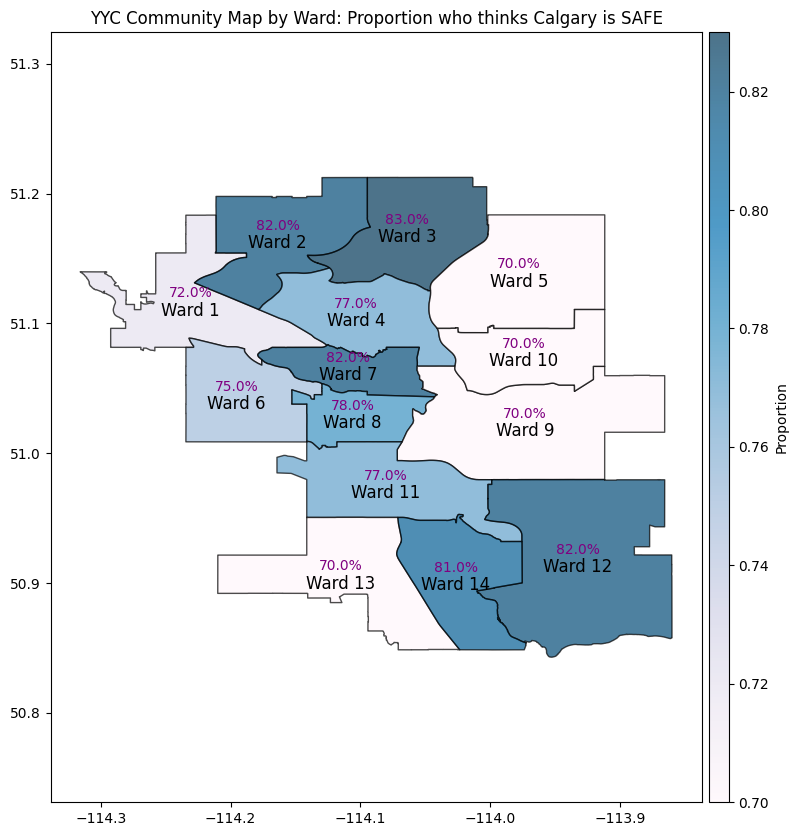

In [315]:
overall_safe = overall_table_ward_safety[overall_table_ward_safety['Overall_Congregated Safety Level']=="Safe"]

overall_safe['MULTIPOLYGON'] = overall_safe['MULTIPOLYGON'].apply(loads)

overall_safe_gdf = gpd.GeoDataFrame(overall_safe, geometry='MULTIPOLYGON', crs='EPSG:4326')


fig = plt.figure()
axis = fig.add_subplot(1,1,1)

# Normalize the 'proportion' values to map them to the colormap
norm = Normalize(vmin=overall_safe_gdf['Proportion'].min(), vmax=overall_safe_gdf['Proportion'].max())
overall_safe_gdf.plot(ax=axis, edgecolor='black',cmap='PuBu', alpha=0.7, column='Proportion', norm=norm)

# Annotate each ward with its name and proportion
for idx, row in overall_safe_gdf.iterrows():
    ward_name = "Ward " + str(row['City of Calgary Ward'])
    proportion = str(row['Proportion'] * 100) +"%"
    x, y = row['MULTIPOLYGON'].centroid.x, row['MULTIPOLYGON'].centroid.y
    #axis.annotate(f"{ward_name}\n {proportion}", xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
    # Customize the size and color of the ward labels
    axis.annotate(ward_name, xy=(x, y), xytext=(-4, -8), textcoords='offset points', color='black', fontsize=12, ha='center')

    # Customize the size and color of the proportion labels
    axis.annotate(f"{proportion}", xy=(x, y), xytext=(-4, 5), textcoords='offset points', color='purple', fontsize=10, ha='center')

# Add colorbar
cbar = plt.colorbar(axis.get_children()[0], ax=axis, pad=0.01, orientation='vertical', aspect=40)
cbar.set_label('Proportion')

plt.axis('equal')
plt.title('YYC Community Map by Ward: Proportion who thinks Calgary is SAFE')
fig.set_size_inches(10,10)

<div style="text-align: justify;">

From the graph above, we can see that for Wards 2,3,7 and 12, people feel more safe where the proportion of Calgarians who feel that Calgary as a whole is safe is around 82-83%

</div>

/var/folders/h_/mr5z3jt574qdqtwf5lgl3z640000gn/T/ipykernel_41246/576566046.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



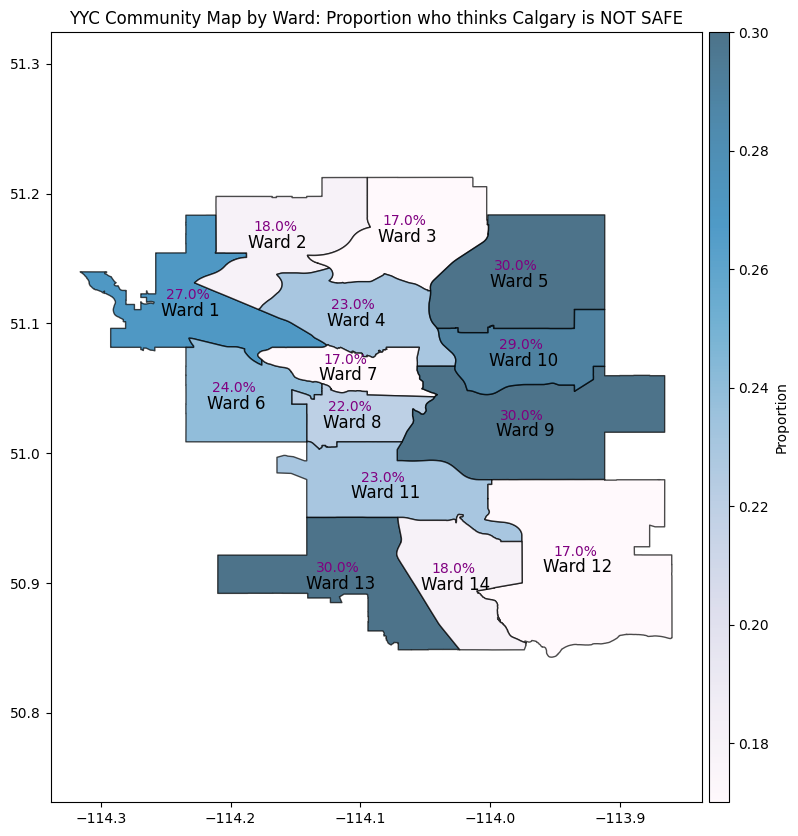

In [316]:
overall_unsafe = overall_table_ward_safety[overall_table_ward_safety['Overall_Congregated Safety Level']=="Unsafe"]

overall_unsafe['MULTIPOLYGON'] = overall_unsafe['MULTIPOLYGON'].apply(loads)

overall_unsafe_gdf = gpd.GeoDataFrame(overall_unsafe, geometry='MULTIPOLYGON', crs='EPSG:4326')


fig = plt.figure()
axis = fig.add_subplot(1,1,1)

# Normalize the 'proportion' values to map them to the colormap
norm = Normalize(vmin=overall_unsafe_gdf['Proportion'].min(), vmax=overall_unsafe_gdf['Proportion'].max())
overall_unsafe_gdf.plot(ax=axis, edgecolor='black',cmap='PuBu', alpha=0.7, column='Proportion', norm=norm)

# Annotate each ward with its name and proportion
for idx, row in overall_unsafe_gdf.iterrows():
    ward_name = "Ward " + str(row['City of Calgary Ward'])
    proportion = f"{row['Proportion']* 100:.1f}" +"%"
    x, y = row['MULTIPOLYGON'].centroid.x, row['MULTIPOLYGON'].centroid.y
    #axis.annotate(f"{ward_name}\n {proportion}", xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
    # Customize the size and color of the ward labels
    axis.annotate(ward_name, xy=(x, y), xytext=(-4, -8), textcoords='offset points', color='black', fontsize=12, ha='center')

    # Customize the size and color of the proportion labels
    axis.annotate(f"{proportion}", xy=(x, y), xytext=(-6, 4), textcoords='offset points', color='purple', fontsize=10, ha='center')

# Add colorbar
cbar = plt.colorbar(axis.get_children()[0], ax=axis, pad=0.01, orientation='vertical', aspect=40)
cbar.set_label('Proportion')

plt.axis('equal')
plt.title('YYC Community Map by Ward: Proportion who thinks Calgary is NOT SAFE')
fig.set_size_inches(10,10)

<div style="text-align: justify;">

The graph above shows that for Wards 5, 9, and 10 have the highest proportion of people who thinks Calgary is not safe as a whole.

</div>

In [317]:
neighbourhood_table_ward_safety = satisfaction_safety.groupby(['City of Calgary Ward', 'Neighbourhood_Congregated Safety Level','MULTIPOLYGON']).size().reset_index(name='Count')
neighbourhood_table_ward_safety['Proportion'] = neighbourhood_table_ward_safety.groupby('City of Calgary Ward')['Count'].transform(lambda x: x / x.sum()).round(2)

neighbourhood_table_ward_safety.head()

,City of Calgary Ward,Neighbourhood_Congregated Safety Level,MULTIPOLYGON,Count,Proportion
0,1,Safe,"MULTIPOLYGON (((-114.2111145 51.1833588, -114....",141,0.75
1,1,Unsafe,"MULTIPOLYGON (((-114.2111145 51.1833588, -114....",46,0.25
2,2,Safe,"MULTIPOLYGON (((-114.0945835 51.1979246, -114....",139,0.91
3,2,Unsafe,"MULTIPOLYGON (((-114.0945835 51.1979246, -114....",13,0.09
4,3,Safe,"MULTIPOLYGON (((-114.0132905 51.2124253, -114....",149,0.84


/var/folders/h_/mr5z3jt574qdqtwf5lgl3z640000gn/T/ipykernel_41246/1411579045.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



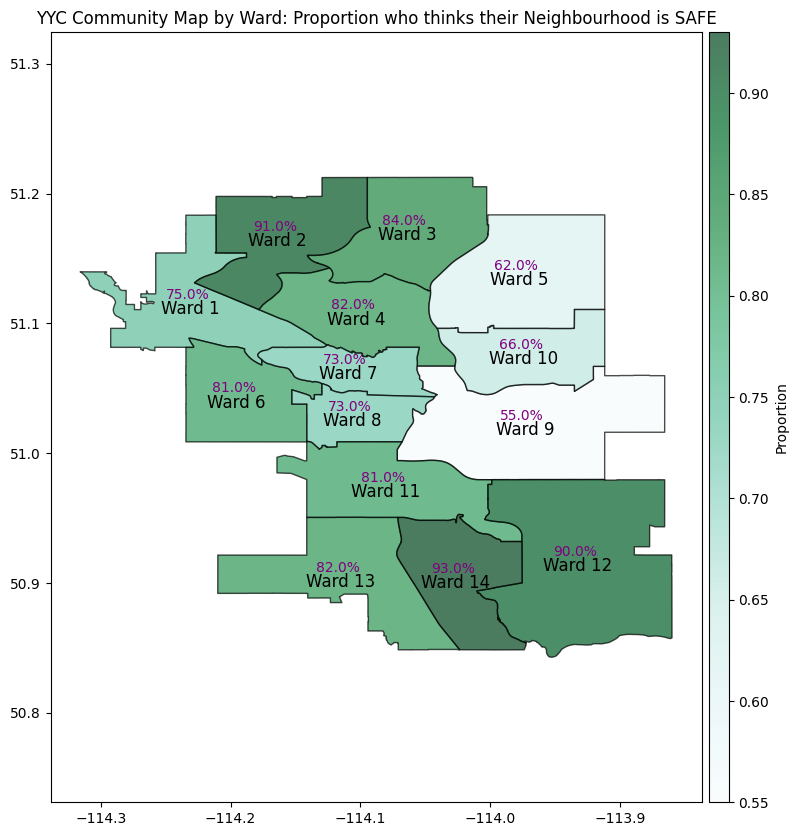

In [318]:
neighbourhood_safe = neighbourhood_table_ward_safety[neighbourhood_table_ward_safety['Neighbourhood_Congregated Safety Level']=="Safe"]

neighbourhood_safe['MULTIPOLYGON'] = neighbourhood_safe['MULTIPOLYGON'].apply(loads)

neighbourhood_safe_gdf = gpd.GeoDataFrame(neighbourhood_safe, geometry='MULTIPOLYGON', crs='EPSG:4326')


fig = plt.figure()
axis = fig.add_subplot(1,1,1)

# Normalize the 'proportion' values to map them to the colormap
norm = Normalize(vmin=neighbourhood_safe_gdf['Proportion'].min(), vmax=neighbourhood_safe_gdf['Proportion'].max())
neighbourhood_safe_gdf.plot(ax=axis, edgecolor='black',cmap='BuGn', alpha=0.7, column='Proportion', norm=norm)

# Annotate each ward with its name and proportion
for idx, row in neighbourhood_safe_gdf.iterrows():
    ward_name = "Ward " + str(row['City of Calgary Ward'])
    proportion = str(round(row['Proportion'] * 100,2)) +"%"
    x, y = row['MULTIPOLYGON'].centroid.x, row['MULTIPOLYGON'].centroid.y
    #axis.annotate(f"{ward_name}\n {proportion}", xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
    # Customize the size and color of the ward labels
    axis.annotate(ward_name, xy=(x, y), xytext=(-4, -7), textcoords='offset points', color='black', fontsize=12, ha='center')

    # Customize the size and color of the proportion labels
    axis.annotate(f"{proportion}", xy=(x, y), xytext=(-6, 4), textcoords='offset points', color='purple', fontsize=10, ha='center')

# Add colorbar
cbar = plt.colorbar(axis.get_children()[0], ax=axis, pad=0.01, orientation='vertical', aspect=40)
cbar.set_label('Proportion')

plt.axis('equal')
plt.title('YYC Community Map by Ward: Proportion who thinks their Neighbourhood is SAFE')
fig.set_size_inches(10,10)

<div style="text-align: justify;">

For their neighbourhoods alone, the graph shows that for Wards 2, 12 & 14, over 90% of the residents feel that their neighbourhood is safe.

</div>

/var/folders/h_/mr5z3jt574qdqtwf5lgl3z640000gn/T/ipykernel_41246/612362160.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



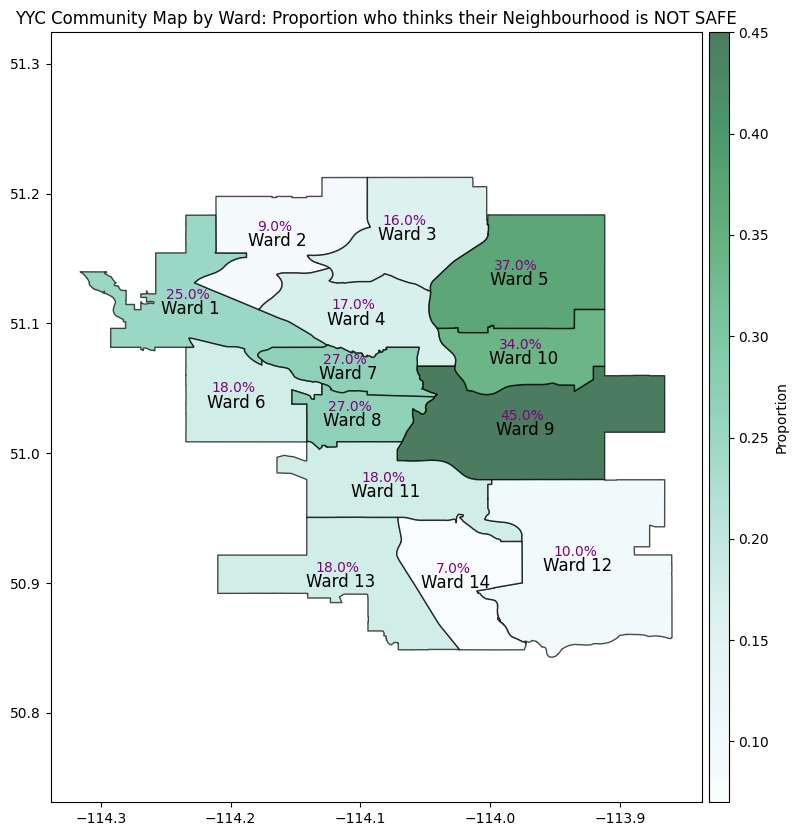

In [319]:
neighbourhood_unsafe = neighbourhood_table_ward_safety[neighbourhood_table_ward_safety['Neighbourhood_Congregated Safety Level']=="Unsafe"]

neighbourhood_unsafe['MULTIPOLYGON'] = neighbourhood_unsafe['MULTIPOLYGON'].apply(loads)

neighbourhood_unsafe_gdf = gpd.GeoDataFrame(neighbourhood_unsafe, geometry='MULTIPOLYGON', crs='EPSG:4326')


fig = plt.figure()
axis = fig.add_subplot(1,1,1)

# Normalize the 'proportion' values to map them to the colormap
norm = Normalize(vmin=neighbourhood_unsafe_gdf['Proportion'].min(), vmax=neighbourhood_unsafe_gdf['Proportion'].max())
neighbourhood_unsafe_gdf.plot(ax=axis, edgecolor='black',cmap='BuGn', alpha=0.7, column='Proportion', norm=norm)

# Annotate each ward with its name and proportion
for idx, row in neighbourhood_unsafe_gdf.iterrows():
    ward_name = "Ward " + str(row['City of Calgary Ward'])
    proportion = str(round(row['Proportion'] * 100,2)) +"%"
    x, y = row['MULTIPOLYGON'].centroid.x, row['MULTIPOLYGON'].centroid.y
    #axis.annotate(f"{ward_name}\n {proportion}", xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
    # Customize the size and color of the ward labels
    axis.annotate(ward_name, xy=(x, y), xytext=(-4, -7), textcoords='offset points', color='black', fontsize=12, ha='center')

    # Customize the size and color of the proportion labels
    axis.annotate(f"{proportion}", xy=(x, y), xytext=(-6, 4), textcoords='offset points', color='purple', fontsize=10, ha='center')

# Add colorbar
cbar = plt.colorbar(axis.get_children()[0], ax=axis, pad=0.01, orientation='vertical', aspect=40)
cbar.set_label('Proportion')

plt.axis('equal')
plt.title('YYC Community Map by Ward: Proportion who thinks their Neighbourhood is NOT SAFE')
fig.set_size_inches(10,10)

Here we can see that Wards 5, 9 and 10 generally feel that their neighbourhood is not so safe

<div style="text-align: justify;">

All in all, combining all graphs, we can see that for Wards 2,3 and 12, people feel more safe and for Wards 5, 9, and 10, people feel less safe. It is also interesting to see that for Ward 13, there’s some inconsistency here where they feel their neighbourhood is pretty safe but doesn’t feel the same for Calgary as a whole

</div>

## Does safety correlate with satisfaction levels?

<div style="text-align: justify;">

To help us in answering this question, we will be doing a heatmap. In our analysis, we are leveraging safety variables along the y-axis and plotting satisfaction levels along the x-axis. The color intensity corresponds to counts, with darker shades indicating higher frequencies. This visual representation will provide a nuanced insight into the potential correlation between safety and satisfaction levels.

</div>

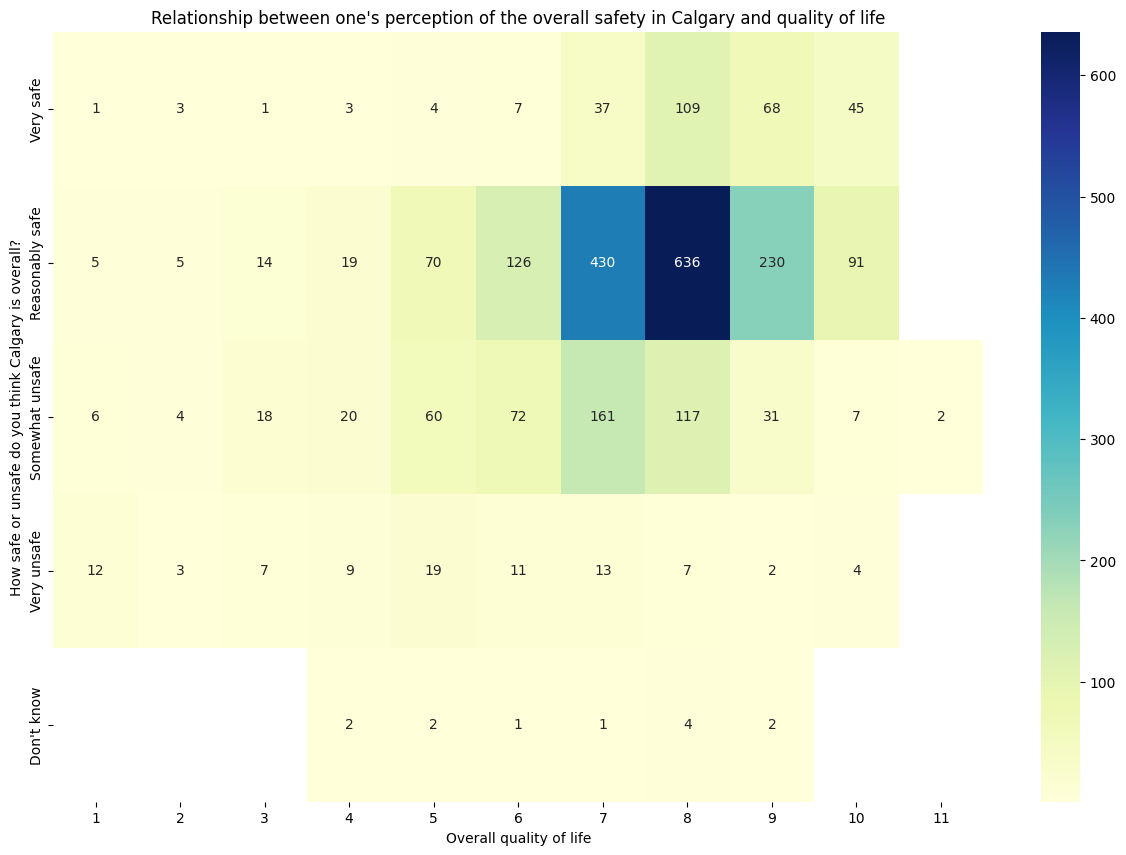

In [320]:
overall_correlation = pd.DataFrame(satisfaction_safety.groupby(['How safe or unsafe do you think Calgary is overall?', "Overall quality of life"])['How safe or unsafe do you think Calgary is overall?'].count())
overall_correlation.rename(columns={'How safe or unsafe do you think Calgary is overall?':'Count'}, inplace=True)
overall_correlation.reset_index(inplace=True)

y_axis = ['Very safe', 'Reasonably safe', 'Somewhat unsafe', 'Very unsafe', "Don't know"]
overall_correlation['How safe or unsafe do you think Calgary is overall?'] = pd.Categorical(overall_correlation['How safe or unsafe do you think Calgary is overall?'], categories=y_axis, ordered=True)

heatmap_overall = overall_correlation.pivot(index='How safe or unsafe do you think Calgary is overall?', columns="Overall quality of life", values='Count')
# Create the heatmap
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
sns.heatmap(heatmap_overall, annot=True, cmap="YlGnBu",fmt=".0f")

# Add labels and title
plt.xlabel("Overall quality of life")
plt.ylabel("How safe or unsafe do you think Calgary is overall?")
plt.title("Relationship between one's perception of the overall safety in Calgary and quality of life")

# Show the plot
plt.show()



We first look at for the overall safety in Calgary and we can see that as one’s perception of safety increases, their view on quality of life also increases. 

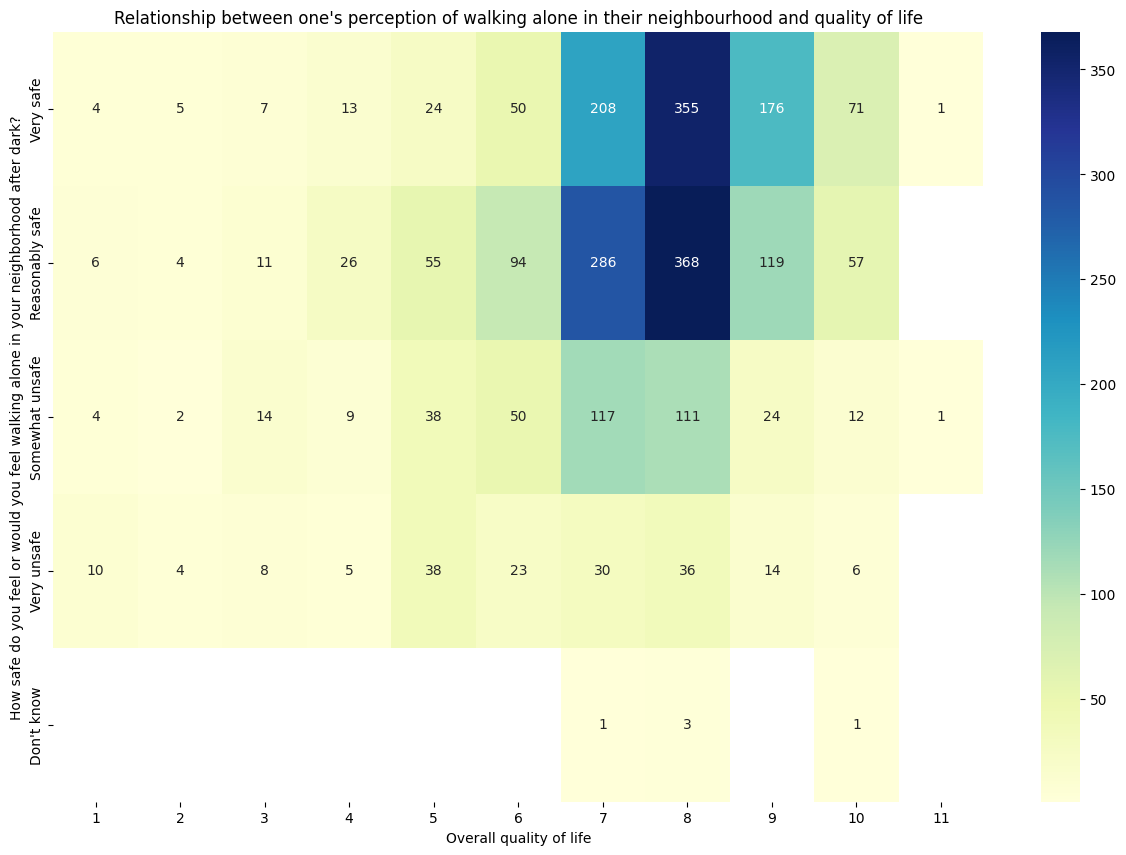

In [321]:
neighbourhood_correlation = pd.DataFrame(satisfaction_safety.groupby(['How safe do you feel or would you feel walking alone in your neighborhood after dark?', "Overall quality of life"])['How safe do you feel or would you feel walking alone in your neighborhood after dark?'].count())
neighbourhood_correlation.rename(columns={'How safe do you feel or would you feel walking alone in your neighborhood after dark?':'Count'}, inplace=True)
neighbourhood_correlation.reset_index(inplace=True)

y_axis = ['Very safe', 'Reasonably safe', 'Somewhat unsafe', 'Very unsafe', "Don't know"]
neighbourhood_correlation['How safe do you feel or would you feel walking alone in your neighborhood after dark?'] = pd.Categorical(neighbourhood_correlation['How safe do you feel or would you feel walking alone in your neighborhood after dark?'], categories=y_axis, ordered=True)

heatmap_neighbourhood= neighbourhood_correlation.pivot(index='How safe do you feel or would you feel walking alone in your neighborhood after dark?', columns="Overall quality of life", values='Count')
# Create the correlation matrix
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
sns.heatmap(heatmap_neighbourhood, annot=True, cmap="YlGnBu",fmt=".0f")

# Add labels and title
plt.xlabel("Overall quality of life")
plt.ylabel("How safe do you feel or would you feel walking alone in your neighborhood after dark?")
plt.title("Relationship between one's perception of walking alone in their neighbourhood and quality of life")

# Show the plot
plt.show()



And the same could also be the said for one’s perception on their neighbourhood and how they view on their quality of life. Therefore, as a whole, safety seems to correlate with satisfaction levels.

# Guiding Question 4 - Can we find relationships between community crime statistics and reported levels of satisfaction on safety?

<div style="text-align: justify;">

Our fourth guiding question extends from the third. Our objective is to delve deeper into the safety aspect, aiming for a more comprehensive understanding of the community crime statistic. We seek to comprehend the relationship between the crime statistics and the reported levels of satisfaction on safety in the survey.

</div>

#### Analyze Crime Dataset


In [322]:
display(crimedata)

,Sector,Community Name,Category,Crime Count,Date,Year,Month,Community Center Point,Ward Boundaries
3,NORTHWEST,01K,Theft FROM Vehicle,2.0,2022/04,2022-01-01,APR,POINT (-114.222716308933 51.168724290089),3.0
5,NORTH,03W,Theft FROM Vehicle,1.0,2022/04,2022-01-01,APR,POINT (-114.026242634091 51.197967711165),11.0
6,NORTHEAST,05D,Theft FROM Vehicle,1.0,2022/04,2022-01-01,APR,POINT (-113.958660846149 51.179594126023),11.0
7,EAST,09O,Theft OF Vehicle,2.0,2022/04,2022-01-01,APR,POINT (-113.877106941343 51.052571080807),12.0
9,SOUTHEAST,12A,Theft OF Vehicle,2.0,2022/04,2022-01-01,APR,POINT (-113.893231521478 50.965056151113),4.0
...,...,...,...,...,...,...,...,...,...
78933,SOUTH,ACADIA,Theft OF Vehicle,9.0,2022/07,2022-01-01,JUL,POINT (-114.053696016182 50.972415073347),10.0
79361,SOUTH,ACADIA,Theft OF Vehicle,4.0,2022/10,2022-01-01,OCT,POINT (-114.053696016182 50.972415073347),10.0
79411,EAST,DOVER,Theft OF Vehicle,15.0,2022/10,2022-01-01,OCT,POINT (-113.993054009063 51.022567722504),10.0
79444,EAST,FOREST LAWN INDUSTRIAL,Theft FROM Vehicle,NaN,2023/05,2023-01-01,MAY,POINT (-113.95696985983 51.027094776949),12.0


In [323]:
wardcrime = crimedata.groupby(["Ward Boundaries","Category"])["Crime Count"].sum()
#print(wardcrime)

fig = px.bar(crimedata, x="Ward Boundaries", y="Crime Count", color="Category", color_discrete_sequence=px.colors.qualitative.Set3 , height=600, title="2022 Crime Count by Ward")
fig.update_layout(xaxis=dict(title="Ward", tickmode='linear'), yaxis_title="Number of Crime")
fig.update_traces(dict(marker_line_width=0))
fig.show()

<div style="text-align: justify;">

For this analysis, we focused on the crime statistics for the year 2022, scrutinizing data across 14 wards. To narrow our scope, we deliberately selected four specific crime categories, as these are deemed most pertinent to residential contexts. These categories include "Theft FROM Vehicle," "Theft OF Vehicle," "Break & Enter - Dwelling," and "Street Robbery." The bar graph illustrates the crime counts within each ward for these specific categories. Notably, wards 1, 5, and 6 emerge as the areas with the lowest crime counts, whereas wards 7, 9, and 10 are characterized by elevated crime rates. An intriguing observation is the varying proportion of street robberies in different wards, with wards 7, 9, and 12 displaying notably higher rates.

</div>


### Overall, which wards have the highest crime rates?

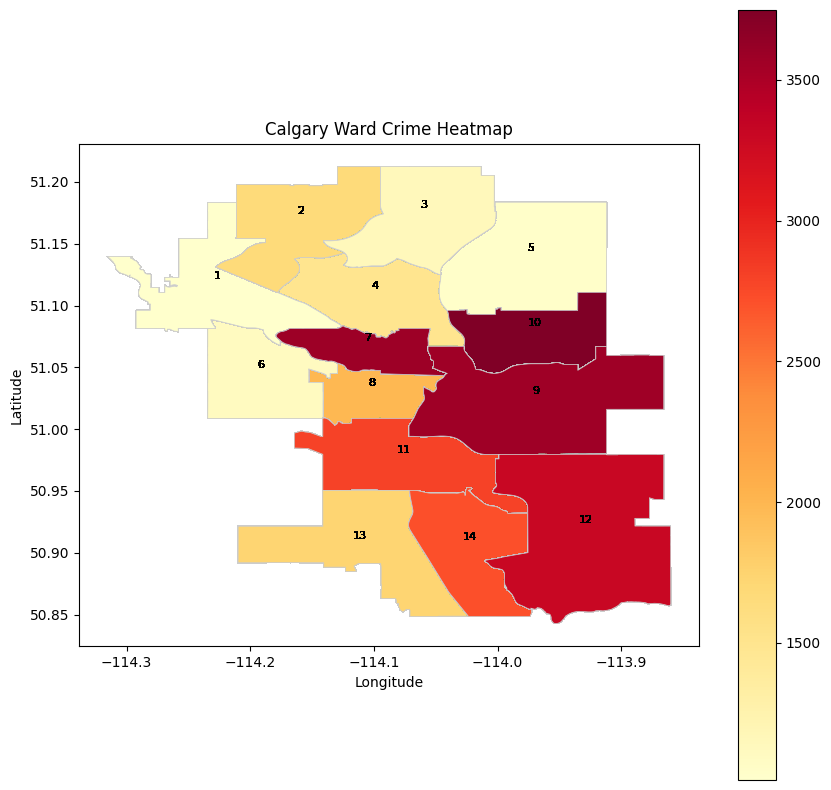

In [324]:
# Convert the Multipolygon into a GeoDataFrame
relevant_dataset['geometry'] = gpd.GeoSeries.from_wkt(relevant_dataset['MULTIPOLYGON'])
main_gdf = gpd.GeoDataFrame(relevant_dataset)

# Replace Ward label "WARD_NUM" to be consistent with relevant dataset
crimedata.rename(columns={'Ward Boundaries': 'City of Calgary Ward'}, inplace = True)

#crimedata.head()

# Group crime data by ward and sum the counts
ward_crime_counts = crimedata.groupby('City of Calgary Ward')['Crime Count'].sum().reset_index()

# Merge the main dataset with crime counts
ward_gdf = main_gdf.merge(ward_crime_counts, left_on = 'City of Calgary Ward', right_on = 'City of Calgary Ward', how = 'left')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
ward_gdf.plot(column='Crime Count', cmap='YlOrRd', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and labels
ax.set_title("Calgary Ward Crime Heatmap")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Annotate wards with ward names
for idx, row in ward_gdf.iterrows():
    plt.annotate(text=row['City of Calgary Ward'], xy=(row['geometry'].centroid.coords[0][0], row['geometry'].centroid.coords[0][1] + 0.007), fontsize=8, ha='center', color='black')

# Annotate wards with crime counts
#for idx, row in ward_gdf.iterrows():
 #   plt.annotate(text=f"Total: {row['Crime Count']}", xy=row['geometry'].centroid.coords[0], fontsize=8, ha='center', color='black')

# Show the plot
plt.show()

<div style="text-align: justify;">

Furthermore, we constructed a heat map to visually convey the geographic distribution of crime incidence within Calgary. The intensity of the orange hues signifies the magnitude of crime counts in the respective wards, with darker shades indicating higher crime frequencies. Again, wards 1 and 5 are the most safe, while 10 stands out as a hotspot of crime activity. To deepen our analysis, we compare it with the survey result of “how safe respondents feel in their neighborhood” that we created for guiding question number 3. Our aim was to discern whether residents residing in wards with elevated crime rates also experienced feelings of "unsafety" in their neighborhood.

Generally, a pattern of consistency emerges between the two datasets. Wards 1, 2, and 6 are notable for both low crime rates and residents feeling safe, while wards 9 and 10 display high crime rates coupled with a sense of insecurity. However, intriguingly, wards 12 and 14 register higher crime rates, yet residents report feeling safe. In contrast, ward 5 exhibits a lower crime rate, but its residents do not perceive their neighborhood as safe. This incongruity warrants further examination and may reveal pertinent insights into the interplay between objective crime statistics and subjective safety perceptions.

</div>


# Conclusion and Future Directions

<div style="text-align: justify;">

In this study, we conducted an analysis of survey satisfaction and safety data in Calgary, while also taking into consideration crime statistics, in order to gain a comprehensive understanding of the areas and factors that influence higher satisfaction rates. Our primary objective was to provide newcomers with valuable information to make well-informed decisions when considering a move to Calgary.

</div>

## Key Findings

<div style="text-align: justify;">

<b>Ward-Specific Analysis: </b> 
In response to our first guiding question, we identified that wards 14, 12, and 8 reported the highest average satisfaction levels, while wards 9, 5, and 10 had the lowest satisfaction levels. Notably, the range between the highest and lowest satisfaction rates was relatively small, typically ranging between 7 and 8. To simplify our analysis, we categorized responses from 7 to 10 as "good," assigning them a value of 1, while all other responses received a value of 0. <br>

<b>Demographic Variation:</b> 
In addressing guiding question 2, we examined how satisfaction levels vary among different demographic groups. We found that certain demographic factors, such as age, gender, and income, had varying influences on residents' satisfaction levels. Expanding on this aspect could provide valuable insights into specific groups' experiences within the city. <br>

<b>Safety Perceptions:</b> 
Guiding question 3 led us to employ heatmaps to visualize the proportions of Calgarians who feel safe. Our analysis revealed that wards 2, 3, and 12 reported the highest levels of safety, while wards 5, 9, and 10 reported the lowest levels of safety.<br>

<b>Crime and Safety Correlation:</b> 
In addressing guiding question 4, we created a heatmap illustrating community crime in Calgary and compared it to residents' perceptions of neighborhood safety. While we found consistent trends, with wards 9 and 10 being the least safe and wards 1, 2, and 6 being the safest, certain wards, such as 12 and 14, reported higher crime rates despite residents feeling safe.

</div>



## Additional Considerations

### Feedback Session:

Following our feedback session, we've implemented the following adjustments:

1. **Enhancing Visual Clarity:** We've refined several of our visual representations, making them more granular and adopting more suitable visualization methods. This is notably exemplified in guiding question two, where we introduced a group bar chart to display demographic variances in satisfaction rates.
   
2. **Granular Data Analysis:** We've also heeded the feedback to scrutinize data with greater granularity. This recommendation has been put into practice through our analysis and breakdown of crime types by ward, which is demonstrated in guiding question three.


**Enhancing Visual Clarity - Grouped Bar chart for swift demographic satisfaction comparison**

<div style="text-align: justify;">

After receiving valuable feedback, we also decided to visualize this information across all of the wards in Calgary. A similar conclusion can be drawn by making a bar chart of the mean satisfaction level across different demographics and wards where we observe that the values of the bars do not change significantly from each other. Different demographics seem to have little to no effect on the overall satisfaction score even after controlling for where they reside.

</div>

In [325]:
# Create mapping functions for all the demographics to relabel

def map_to_labels_ag(stats):
    if not math.isnan(stats):
        return legend["Age group"][int(int(stats) // 2)]
    else:
        return np.nan  
guide_2["Age group"] = guide_2["Age group"].apply(map_to_labels_ag)

def map_to_labels_hic(stats):
    if not math.isnan(stats):
        return legend["Household income category"][int(int(stats) // 2)]
    else:
        return np.nan 
guide_2["Household income category"] = guide_2["Household income category"].apply(map_to_labels_hic)

def map_to_labels_hle(stats):
    if not math.isnan(stats):
        return legend["Highest level of education"][int(stats)-1]
    else:
        return np.nan  
guide_2["Highest level of education"] = guide_2["Highest level of education"].apply(map_to_labels_hle)

def map_to_labels_g(stats):
    if not math.isnan(stats):
        return legend["Gender"][int(stats)-1]
    else:
        return np.nan  
guide_2["Gender"] = guide_2["Gender"].apply(map_to_labels_g)



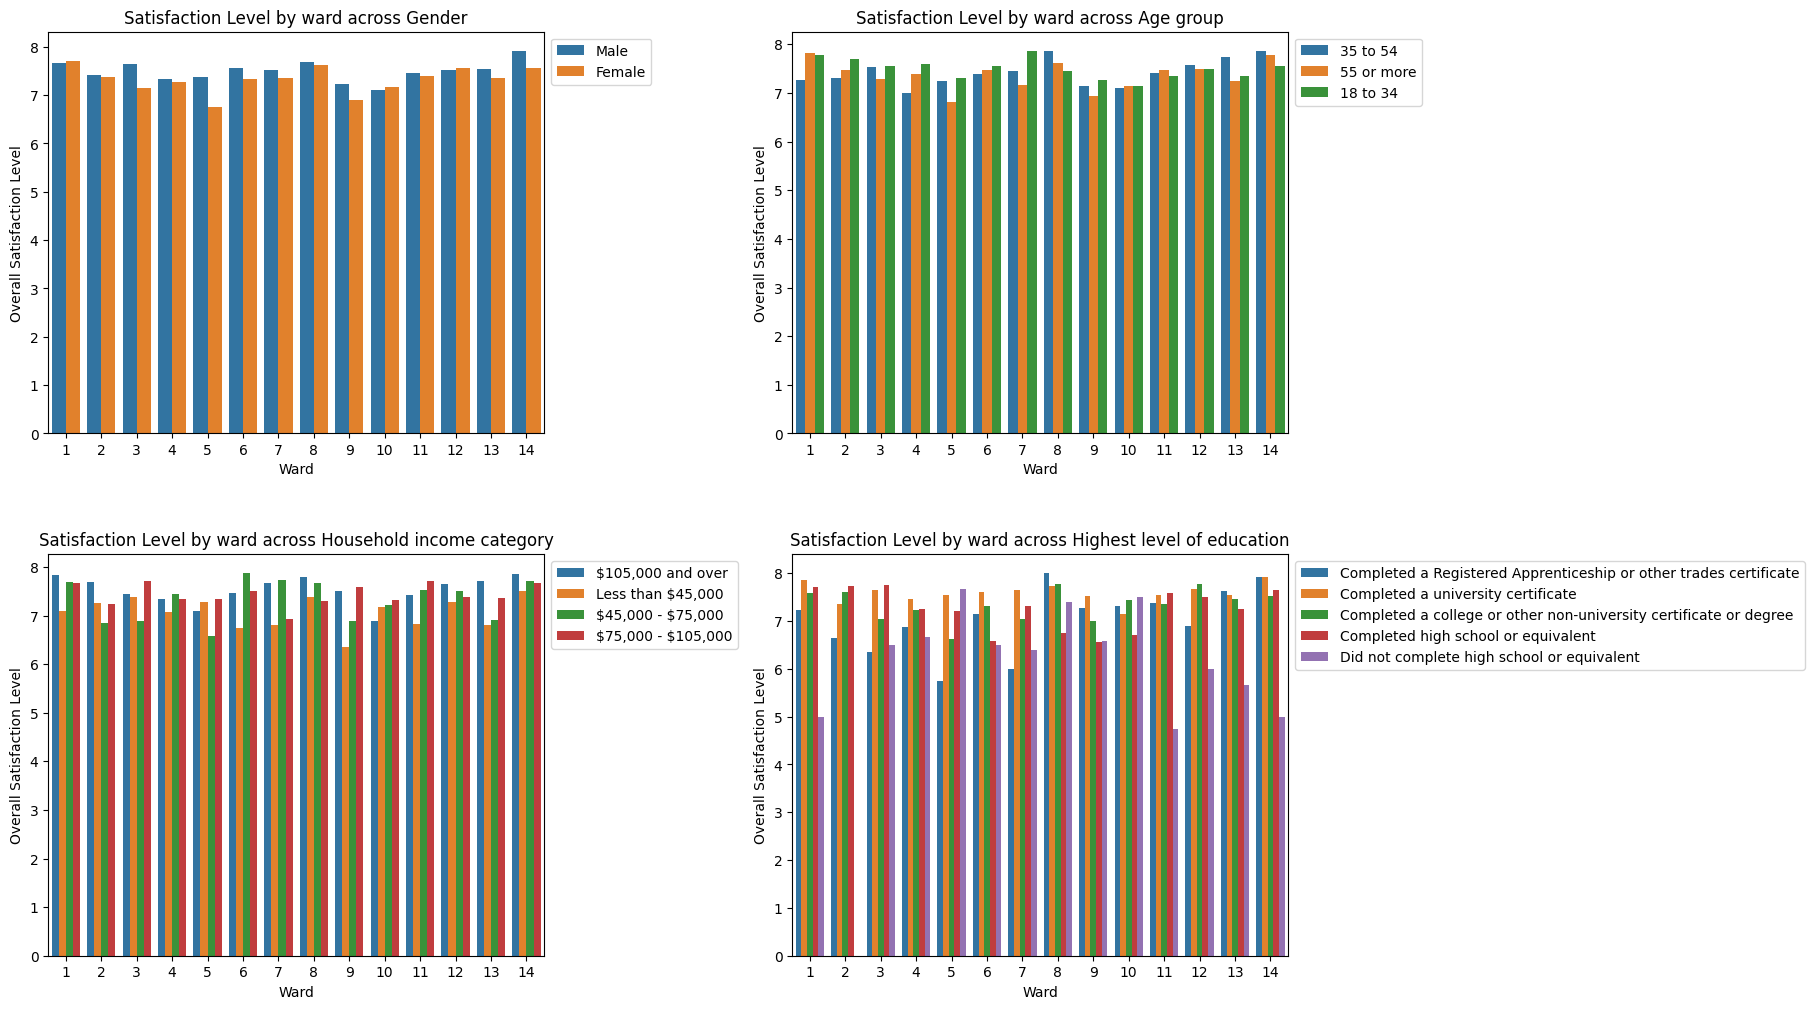

In [326]:
#Display the Group Chart

# Create function to change label names
def change_legend_labels(legend, axis, original_labels):
    legend_labels = [text.get_text() for text in axis.get_legend().get_texts()]
    
    for i, label in enumerate(legend_labels):
        if label.isnumeric():
            numeric_label = int(float(label))
            if numeric_label in original_labels:
                legend_labels[i] = original_labels[numeric_label]
    
    for text, label in zip(axis.get_legend().get_texts(), legend_labels):
        text.set_text(label)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

for i, demographic in enumerate(demographics_list):
    row, column = divmod(i, 2)
    axis = axes[row, column]

    sns.barplot(
        x="City of Calgary Ward",
        y="Overall quality of life",
        hue=demographic,
        data=guide_2,
        ax=axis,
        errorbar=None  # Set error bar to None to remove error bars
    )

    axis.set_xlabel("Ward")
    axis.set_ylabel("Overall Satisfaction Level")
    axis.set_title("Satisfaction Level by ward across " + demographic)
    axis.legend(bbox_to_anchor=(1, 1), loc='upper left')

    original_labels = legend.get(demographic)  # Replace 'demographic' with the actual key for your legend
    change_legend_labels(legend, axis, original_labels)
    

plt.show()


<div style="text-align: justify;">
The grouped bar chart as requested above. At a quick glance, the overall satisfaction does not vary across the wards and demographic groups so we can infer the overall satisfaction level is independent of both Wards and the demographic group. However, it is noteworthy that there are slight variations in education demographic group, particularly for individuals who did not complete high school. This variation suggests that amongst the demographic group, education level may play the most role, although modest in influencing satisfaction levels within this specific population.
</div>


**Granular Data Analysis - Distribution of crime type by ward**

In [327]:
display(crimedata)

type_ward_crime_counts = crimedata.groupby(['City of Calgary Ward','Category'])['Crime Count'].sum().reset_index()

# Group by "Category" and sum the "Crime Count" within each group
total_crime_count_per_category = crimedata.groupby('Category')['Crime Count'].sum().reset_index(name='Total Crime Count')

# Merge the total crime count back into the original DataFrame
type_ward_crime_counts = pd.merge(type_ward_crime_counts, total_crime_count_per_category, on='Category')

type_ward_crime_counts['Proportion'] = type_ward_crime_counts['Crime Count']/type_ward_crime_counts['Total Crime Count']

display(type_ward_crime_counts.head())

,Sector,Community Name,Category,Crime Count,Date,Year,Month,Community Center Point,City of Calgary Ward
3,NORTHWEST,01K,Theft FROM Vehicle,2.0,2022/04,2022-01-01,APR,POINT (-114.222716308933 51.168724290089),3.0
5,NORTH,03W,Theft FROM Vehicle,1.0,2022/04,2022-01-01,APR,POINT (-114.026242634091 51.197967711165),11.0
6,NORTHEAST,05D,Theft FROM Vehicle,1.0,2022/04,2022-01-01,APR,POINT (-113.958660846149 51.179594126023),11.0
7,EAST,09O,Theft OF Vehicle,2.0,2022/04,2022-01-01,APR,POINT (-113.877106941343 51.052571080807),12.0
9,SOUTHEAST,12A,Theft OF Vehicle,2.0,2022/04,2022-01-01,APR,POINT (-113.893231521478 50.965056151113),4.0
...,...,...,...,...,...,...,...,...,...
78933,SOUTH,ACADIA,Theft OF Vehicle,9.0,2022/07,2022-01-01,JUL,POINT (-114.053696016182 50.972415073347),10.0
79361,SOUTH,ACADIA,Theft OF Vehicle,4.0,2022/10,2022-01-01,OCT,POINT (-114.053696016182 50.972415073347),10.0
79411,EAST,DOVER,Theft OF Vehicle,15.0,2022/10,2022-01-01,OCT,POINT (-113.993054009063 51.022567722504),10.0
79444,EAST,FOREST LAWN INDUSTRIAL,Theft FROM Vehicle,NaN,2023/05,2023-01-01,MAY,POINT (-113.95696985983 51.027094776949),12.0


,City of Calgary Ward,Category,Crime Count,Total Crime Count,Proportion
0,1.0,Break & Enter - Dwelling,182.0,2722.0,0.066863
1,2.0,Break & Enter - Dwelling,184.0,2722.0,0.067597
2,3.0,Break & Enter - Dwelling,161.0,2722.0,0.059148
3,4.0,Break & Enter - Dwelling,162.0,2722.0,0.059515
4,5.0,Break & Enter - Dwelling,126.0,2722.0,0.046289


In [328]:
interest_gdf = main_gdf[['City of Calgary Ward', 'MULTIPOLYGON']].drop_duplicates()
interest_gdf

,City of Calgary Ward,MULTIPOLYGON
0,4,"MULTIPOLYGON (((-114.1213042 51.1386515, -114...."
187,8,"MULTIPOLYGON (((-114.1229467 51.0501104, -114...."
368,5,"MULTIPOLYGON (((-113.9349634 51.1835449, -113...."
510,6,"MULTIPOLYGON (((-114.1759344 51.0678162, -114...."
718,11,"MULTIPOLYGON (((-114.1316739 51.0032016, -114...."
931,1,"MULTIPOLYGON (((-114.2111145 51.1833588, -114...."
1118,7,"MULTIPOLYGON (((-114.1198488 51.0815274, -114...."
1286,10,"MULTIPOLYGON (((-113.9117342 51.1106362, -113...."
1486,13,"MULTIPOLYGON (((-114.117961 50.9505378, -114.1..."
1680,14,"MULTIPOLYGON (((-114.0225205 50.9526149, -114...."


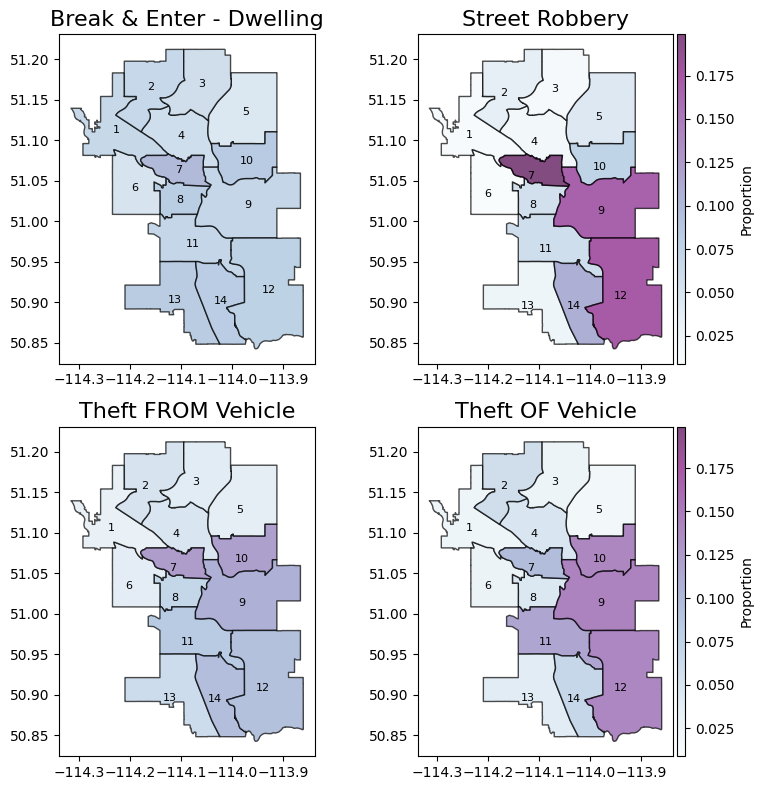

In [329]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8,8))


# Break & Enter - Dwelling

break_dwelling = type_ward_crime_counts[type_ward_crime_counts['Category']=="Break & Enter - Dwelling"]

break_dwelling_gdf = interest_gdf.merge(break_dwelling, on = 'City of Calgary Ward', how = 'left')

break_dwelling_gdf['MULTIPOLYGON'] = break_dwelling_gdf['MULTIPOLYGON'].apply(loads)

break_dwelling_gdf = gpd.GeoDataFrame(break_dwelling_gdf, geometry='MULTIPOLYGON', crs='EPSG:4326')

# Normalize the 'proportion' values to map them to the colormap
norm = Normalize(vmin=type_ward_crime_counts['Proportion'].min(), vmax=type_ward_crime_counts['Proportion'].max())
break_dwelling_gdf.plot(ax=axis[0,0], edgecolor='black',cmap='BuPu', alpha=0.7, column='Proportion', norm=norm)

# Annotate each ward with its name and proportion
for idx, row in break_dwelling_gdf.iterrows():
    ward_name = str(row['City of Calgary Ward'])
    count = row['Proportion']
    x, y = row['MULTIPOLYGON'].centroid.x, row['MULTIPOLYGON'].centroid.y
    #axis.annotate(f"{ward_name}\n {proportion}", xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
    # Customize the size and color of the ward labels
    axis[0,0].annotate(ward_name, xy=(x, y), xytext=(0, -3), textcoords='offset points', color='black', fontsize=8, ha='center')

    # Customize the size and color of the proportion labels
    #axis[0,0].annotate(f"{count}", xy=(x, y), xytext=(-6, 4), textcoords='offset points', color='purple', fontsize=8, ha='center')

# Add colorbar
# cbar = plt.colorbar(axis[0,0].get_children()[0], ax=axis[0,0], pad=0.01, orientation='vertical', aspect=40)
# cbar.set_label('Proportion')
axis[0,0].set_title('Break & Enter - Dwelling', fontsize=16)

## Street Robbery

street_robbery = type_ward_crime_counts[type_ward_crime_counts['Category']=="Street Robbery"]

street_robbery_gdf = interest_gdf.merge(street_robbery, on = 'City of Calgary Ward', how = 'left')

street_robbery_gdf['MULTIPOLYGON'] = street_robbery_gdf['MULTIPOLYGON'].apply(loads)

street_robbery_gdf = gpd.GeoDataFrame(street_robbery_gdf, geometry='MULTIPOLYGON', crs='EPSG:4326')

# Normalize the 'proportion' values to map them to the colormap
#norm = Normalize(vmin=street_robbery_gdf['Crime Count'].min(), vmax=street_robbery_gdf['Crime Count'].max())
street_robbery_gdf.plot(ax=axis[0,1], edgecolor='black',cmap='BuPu', alpha=0.7, column='Proportion', norm=norm)

# Annotate each ward with its name and proportion
for idx, row in street_robbery_gdf.iterrows():
    ward_name = str(row['City of Calgary Ward'])
    count = row['Proportion']
    x, y = row['MULTIPOLYGON'].centroid.x, row['MULTIPOLYGON'].centroid.y
    #axis.annotate(f"{ward_name}\n {proportion}", xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
    # Customize the size and color of the ward labels
    axis[0,1].annotate(ward_name, xy=(x, y), xytext=(-4, -7), textcoords='offset points', color='black', fontsize=8, ha='center')

    # Customize the size and color of the proportion labels
    #axis[0,1].annotate(f"{count}", xy=(x, y), xytext=(-6, 4), textcoords='offset points', color='purple', fontsize=10, ha='center')

# Add colorbar
cbar = plt.colorbar(axis[0,1].get_children()[0], ax=axis[0,1], pad=0.01, orientation='vertical', aspect=40)
cbar.set_label('Proportion')
axis[0,1].set_title('Street Robbery', fontsize=16)

## Theft FROM Vehicle
from_vehicle = type_ward_crime_counts[type_ward_crime_counts['Category']=="Theft FROM Vehicle"]

from_vehicle_gdf = interest_gdf.merge(from_vehicle, on = 'City of Calgary Ward', how = 'left')

from_vehicle_gdf['MULTIPOLYGON'] = from_vehicle_gdf['MULTIPOLYGON'].apply(loads)

from_vehicle_gdf = gpd.GeoDataFrame(from_vehicle_gdf, geometry='MULTIPOLYGON', crs='EPSG:4326')

# Normalize the 'proportion' values to map them to the colormap
#norm = Normalize(vmin=from_vehicle_gdf['Crime Count'].min(), vmax=from_vehicle_gdf['Crime Count'].max())
from_vehicle_gdf.plot(ax=axis[1,0], edgecolor='black',cmap='BuPu', alpha=0.7, column='Proportion', norm=norm)

# Annotate each ward with its name and proportion
for idx, row in from_vehicle_gdf.iterrows():
    ward_name = str(row['City of Calgary Ward'])
    count = row['Proportion']
    x, y = row['MULTIPOLYGON'].centroid.x, row['MULTIPOLYGON'].centroid.y
    #axis.annotate(f"{ward_name}\n {proportion}", xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
    # Customize the size and color of the ward labels
    axis[1,0].annotate(ward_name, xy=(x, y), xytext=(-4, -7), textcoords='offset points', color='black', fontsize=8, ha='center')

    # Customize the size and color of the proportion labels
    #axis[1,0].annotate(f"{count}", xy=(x, y), xytext=(-6, 4), textcoords='offset points', color='purple', fontsize=10, ha='center')

# Add colorbar
# cbar = plt.colorbar(axis[1,0].get_children()[0], ax=axis[1,0], pad=0.01, orientation='vertical', aspect=40)
# cbar.set_label('Proportion')
axis[1,0].set_title('Theft FROM Vehicle', fontsize=16)

## Theft OF Vehicle
of_vehicle = type_ward_crime_counts[type_ward_crime_counts['Category']=="Theft OF Vehicle"]

of_vehicle_gdf = interest_gdf.merge(of_vehicle, on = 'City of Calgary Ward', how = 'left')

of_vehicle_gdf['MULTIPOLYGON'] = of_vehicle_gdf['MULTIPOLYGON'].apply(loads)

of_vehicle_gdf = gpd.GeoDataFrame(of_vehicle_gdf, geometry='MULTIPOLYGON', crs='EPSG:4326')

# Normalize the 'proportion' values to map them to the colormap
#norm = Normalize(vmin=of_vehicle_gdf['Crime Count'].min(), vmax=of_vehicle_gdf['Crime Count'].max())
of_vehicle_gdf.plot(ax=axis[1,1], edgecolor='black',cmap='BuPu', alpha=0.7, column='Proportion', norm=norm)

# Annotate each ward with its name and proportion
for idx, row in of_vehicle_gdf.iterrows():
    ward_name = str(row['City of Calgary Ward'])
    count = row['Proportion']
    x, y = row['MULTIPOLYGON'].centroid.x, row['MULTIPOLYGON'].centroid.y
    #axis.annotate(f"{ward_name}\n {proportion}", xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
    # Customize the size and color of the ward labels
    axis[1,1].annotate(ward_name, xy=(x, y), xytext=(-4, -7), textcoords='offset points', color='black', fontsize=8, ha='center')

    # Customize the size and color of the proportion labels
    #axis[1,1].annotate(f"{count}", xy=(x, y), xytext=(-6, 4), textcoords='offset points', color='purple', fontsize=10, ha='center')

# Add colorbar
cbar = plt.colorbar(axis[1,1].get_children()[0], ax=axis[1,1], pad=0.01, orientation='vertical', aspect=40)
cbar.set_label('Proportion')
axis[1,1].set_title('Theft OF Vehicle', fontsize=16)

plt.tight_layout()
#fig.set_size_inches(10,10)
plt.show()

<div style="text-align: justify;">

There were a few feedback on how a heatmap broken down for each type of crime would allow us to understand the distribution of crime for each ward better and may have given us more insights in answering our guiding questions. So we did another geographical heatmap for each crime type.
 
In each subgraph above, it illustrates the proportion of that particular type of crime happening in the respective wards. We can see that in general, ward 7 seems to be experiencing the highest proportion of crimes no matter the crime type. But for wards 9 and 12, Street Robbery and Theft Of Vehicle seem to be occurring more there.
 
As mentioned in our answer to guiding question #4, it was pretty interesting to see how for Ward 5, although there is a low crime rate, people are feeling unsafe and for Wards 12 & 14, there is a higher crime rate but people are feeling safe. However, although we can identify the specific types of crime occurring more for Ward 12, in general, it seems that diving deeper into each respective crime type still does not really show much connection as to why people in these wards feel the way they do. There may still be other factors in play that we have not yet accounted for.

</div>



<div style="text-align: justify;">

<h3>Limitations</h3> We should also address the limitations of our study more explicitly. These limitations may include the representativeness of the sample, the potential for confounding variables, and the restriction to a specific time frame (2022). Acknowledging these limitations is crucial for a more accurate interpretation of our findings. <br>


<h3>Practical Implications</h3> Our findings may also have practical implications for city planning and decision-making. City officials, policymakers, and community organizations can use this data to inform strategies aimed at enhancing safety and satisfaction for all residents. The information gathered here can contribute to more targeted interventions in areas with lower satisfaction and safety levels. <br>


<h3>Future Research</h3> Ultimately, analyzing perceptions of safety and satisfaction is a complex task, and our analysis serves as a starting point. Additionally, understanding a newcomer’s needs is a diverse and fruitful process, as there is no “one size fits all” solution. Nevertheless, several avenues for further research and development should be explored: <br>

</div>

1. <div style="text-align: justify;"> <b> Test and analyze with more variables:</b>  Consider including additional variables such as the number of schools, transit stops, and emergency services within each ward, as well as their proximity to residents. Applying statistical significance tests to these variables can help identify the most significant factors contributing to satisfaction and safety levels. </div> <br>
2. <div style="text-align: justify;"> <b>Conduct a time-series analysis:</b> Expanding the scope beyond the year 2022 to encompass historical trends and patterns for satisfaction and safety could provide deeper insights. </div> <br>
3. <div style="text-align: justify;"> <b>Include more comprehensive crime statistics:</b> While incorporating more crime statistics may be beneficial, it's essential to carefully consider the relevance of each crime type to safety levels. Not all crimes may directly impact residents' feelings of safety. Therefore, further research is needed to understand the relationship between crime statistics and safety perceptions. </div> <br>

<div style="text-align: justify;">

In conclusion, our analysis serves as a valuable starting point in understanding the factors influencing satisfaction and safety in Calgary. By addressing these considerations and future research opportunities, we aim to contribute to a more informed, safe, and satisfied community for both newcomers and longtime residents.

</div>


# References
<style>
    p {
        text-indent: -1em;
        padding-left: 1em;
    }
</style>

<p>
Fernando, T. (2023, May 10). Calgary sees record annual population growth, expects decrease in 
job growth rate: report. CBC. https://www.cbc.ca/news/canada/calgary/calgary-spring-economic-outlook-2023-annual-population-growth-record-1.6837424 
</p>
<p>
The City of Calgary (2020). Community Crime Statistics [Dataset]. Data Calgary. 
https://data.calgary.ca/Health-and-Safety/Community-Crime-Statistics/78gh-n26t 
</p>
<p>
The City of Calgary (2023a). Fall Survey of Calgarians (2022) [Dataset]. Data Calgary. https://data.calgary.ca/Help-and-Information/Fall-Survey-of-Calgarians-2022-/5geu-ar8w 
</p>
<p>
The City of Calgary (2023b). Ward boundaries. [Dataset]. Data Calgary.  
https://data.calgary.ca/Government/Ward-Boundaries/r9vx-mhnf
</p>

